In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/attrition/Attrition.csv


In [3]:
df = pd.read_csv("../input/attrition/Attrition.csv" , sep = "," ,encoding = "utf-8")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

# Data Discovery

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.nunique().sort_values(ascending= True)

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [7]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [8]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [9]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

- Since that there are 3 columns having a constant value in all rows, dropping them will help in feature reduction

In [10]:
df= df.drop(['StandardHours','EmployeeCount','Over18'], axis=1)
df.shape

(1470, 32)

In [11]:
number_of_columns= df.select_dtypes(include='int64').columns
number_of_columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [12]:
(len(number_of_columns)/df.shape[1])*100

75.0

**--> 74% of the data is numerical while 26% of the data is categorical**

In [13]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df2=df.copy()

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in df2.columns:
    if df2[column].dtype == 'object':  
        df2[column] = label_encoder.fit_transform(df[column])


**--> no null values present nor duplicates**

In [19]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  ...  PerformanceRating  \
count  1470.000000      1470.000000  ...        1470.000000   
mean      2.063946         2.728571  ...           3.153741   
std       1.106940         1.102846  ...           0.360824   
min       1.000000         1.000000  ...           3.000000   
25%       1.000000         2.000000  ...           3.000000   
50%       2.000000         3.000000  ...           3.000000   
75%       3.000000         4.000000  ...           3.000000   
max       5.000000         4.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 24 columns]

# Business Questions :

***Age and Gender on Attrition : Q1 , Q3 , Q27***:

## 1. How Is Attrition Affected by Gender?

In [20]:
df[['Attrition','Gender']]

Attrition  Gender
0          Yes  Female
1           No    Male
2          Yes    Male
3           No  Female
4           No    Male
...        ...     ...
1465        No    Male
1466        No    Male
1467        No    Male
1468        No    Male
1469        No    Male

[1470 rows x 2 columns]

In [26]:
value_counts_male=df[df['Gender']=='Male']['Attrition'].value_counts()
value_counts_male

No     732
Yes    150
Name: Attrition, dtype: int64

In [27]:
value_counts_female=df[df['Gender']=='Female']['Attrition'].value_counts()
value_counts_female

No     501
Yes     87
Name: Attrition, dtype: int64

In [28]:
ratio_yes_female =value_counts_female['Yes']/df['Gender'].value_counts()['Female']*100
ratio_yes_female

14.795918367346939

In [29]:
ratio_yes_male =value_counts_male['Yes']/df['Gender'].value_counts()['Male']*100
ratio_yes_male

17.006802721088434

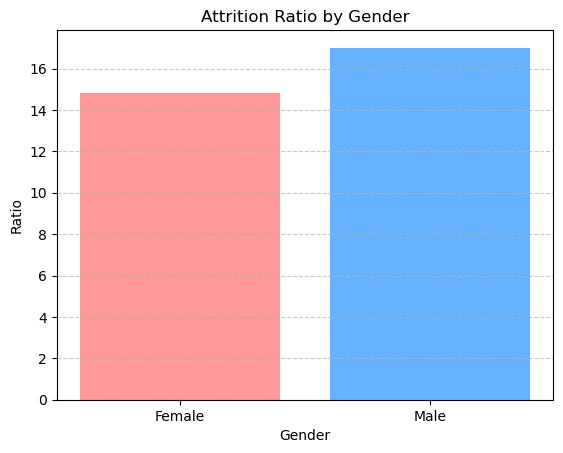

In [30]:

ratio = [ratio_yes_female, ratio_yes_male]
labels = ['Female', 'Male']

colors = ['#FF9999', '#66B2FF']
fig, ax = plt.subplots()
bars = ax.bar(labels, ratio, color=colors)


plt.title('Attrition Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Ratio')


ax.yaxis.grid(True, linestyle='--', alpha=0.7)

- *chi square test to check independence of both categorical variables:* 

In [31]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Gender'], df['Attrition'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square value:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square value: 1.1169671241970975
p-value: 0.29057244902890855
Degrees of freedom: 1
Expected frequencies: [[493.2  94.8]
 [739.8 142.2]]


In [32]:
contingency_table

Attrition   No  Yes
Gender             
Female     501   87
Male       732  150

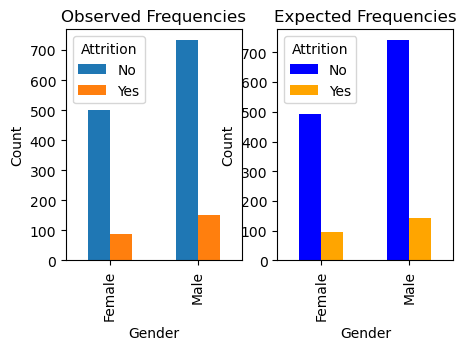

In [33]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(5, 3))
contingency_table.plot(kind='bar', ax=ax)
ax.set_ylabel('Count')
ax.set_title('Observed Frequencies')
ax.legend(title='Attrition')

expected_counts = pd.DataFrame(expected, columns=contingency_table.columns, index=contingency_table.index)
expected_counts.plot(kind='bar', ax=ax2, color=['blue', 'orange'])
ax2.set_ylabel('Count')
ax2.set_title('Expected Frequencies')
ax2.legend(title='Attrition')

plt.show()

- **Chi-square test Observations**:  based on the chi square test it seems that there is no significant association between gender and attrition in the given data. This means that, there's no strong evidence to conclude that gender has a direct influence on attrition. Also , expected frequencies being almost as equal to observed frequencies suggests that the two variables are independent

**Ans(1) : percentage of males who leave the company is higher than that of females.**

## 13.what is effect of age on attrition ?

In [37]:
Age_attrition= df.groupby(['Age'])['Attrition'].value_counts().reset_index(name='count').sort_values('count',ascending=False)
Age_attrition= Age_attrition[Age_attrition['Attrition']=='Yes']
Age_attrition

Age Attrition  count
23   29       Yes     18
27   31       Yes     18
21   28       Yes     14
31   33       Yes     12
17   26       Yes     12
29   32       Yes     11
35   35       Yes     10
33   34       Yes      9
25   30       Yes      9
13   24       Yes      7
7    21       Yes      6
43   39       Yes      6
47   41       Yes      6
39   37       Yes      6
37   36       Yes      6
15   25       Yes      6
53   44       Yes      6
4    20       Yes      6
2    19       Yes      6
45   40       Yes      5
79   58       Yes      5
9    22       Yes      5
65   50       Yes      5
57   46       Yes      4
11   23       Yes      4
1    18       Yes      4
76   56       Yes      3
59   47       Yes      3
69   52       Yes      3
19   27       Yes      3
74   55       Yes      3
63   49       Yes      2
51   43       Yes      2
49   42       Yes      2
61   48       Yes      2
55   45       Yes      2
71   53       Yes      2
67   51       Yes      2
41   38       Yes      2

In [38]:
Age_attrition['percentage']= Age_attrition['count'] / (df['Age'].value_counts())[Age_attrition['Age']].values*100

In [39]:
Age_attrition= Age_attrition.sort_values('percentage', ascending = False)
Age_attrition

Age Attrition  count  percentage
2    19       Yes      6   66.666667
4    20       Yes      6   54.545455
1    18       Yes      4   50.000000
7    21       Yes      6   46.153846
79   58       Yes      5   35.714286
9    22       Yes      5   31.250000
17   26       Yes     12   30.769231
21   28       Yes     14   29.166667
11   23       Yes      4   28.571429
13   24       Yes      7   26.923077
23   29       Yes     18   26.470588
27   31       Yes     18   26.086957
15   25       Yes      6   23.076923
76   56       Yes      3   21.428571
31   33       Yes     12   20.689655
53   44       Yes      6   18.181818
29   32       Yes     11   18.032787
65   50       Yes      5   16.666667
69   52       Yes      3   16.666667
47   41       Yes      6   15.000000
25   30       Yes      9   15.000000
43   39       Yes      6   14.285714
74   55       Yes      3   13.636364
35   35       Yes     10   12.820513
59   47       Yes      3   12.500000
57   46       Yes      4   12.121212
39   37       Yes      6   12.000000
33   34       Yes      9   11.688312
67   51       Yes      2   10.526316
61   48       Yes      2   10.526316
71   53       Yes      2   10.526316
45   40       Yes      5    8.771930
37   36       Yes      6    8.695652
63   49       Yes      2    8.333333
51   43       Yes      2    6.250000
19   27       Yes      3    6.250000
55   45       Yes      2    4.878049
49   42       Yes      2    4.347826
41   38       Yes      2    3.448276

In [40]:
import scipy.stats
point_biserial_corr = scipy.stats.pointbiserialr(df2['Age'], df2['Attrition'])

print("Point-Biserial Correlation Coefficient:", point_biserial_corr.correlation)
print("P-value:", point_biserial_corr.pvalue)

Point-Biserial Correlation Coefficient: -0.15920500686577957
P-value: 8.356308021103691e-10


In [41]:
plt.figure(figsize=(3, 5))

px.violin(df, x='Attrition', y='Age', box = True,color='Attrition', color_discrete_map= {'Yes': 'green', 'No': 'blue'})

<Figure size 300x500 with 0 Axes>

- **Violin plot observation**: Wider sections indicate higher density which means that age lying between 20 and 30 have higher attritions. Also the median of yes attritions are lower than that of No attritions

**Ans(13): The highest total number of attritions are from the younger employees especially the ones who are 29 to 31 years old. However, The highest percentage of attritions are from 19, 20, 18 years old employees. Hence, we can say that age and attrition are very weakly correlated based on the correlation values obtained from the above matrices and also from the point biserial correlation**

## 27. What role does gender and age play in this workplace?


In [43]:
gender_age_attrition= df.groupby(['Gender','Age'])['Attrition'].value_counts().reset_index(name='count')
gender_age_attrition= gender_age_attrition[gender_age_attrition['Attrition']=='Yes'].sort_values('count',ascending=False)
gender_age_attrition= gender_age_attrition.drop(['Attrition'],axis=1)
gender_age_attrition

Gender  Age  count
101    Male   31     11
95     Male   28     11
21   Female   29     10
91     Male   26      9
97     Male   29      8
..      ...  ...    ...
47   Female   43      1
42   Female   40      1
37   Female   37      1
35   Female   36      1
81     Male   21      1

[70 rows x 3 columns]

In [44]:
Gender_Age_counts= df.groupby(['Gender', 'Age']).size().reset_index(name='count')
Gender_Age_counts

Gender  Age  count
0   Female   18      4
1   Female   19      4
2   Female   20      6
3   Female   21      6
4   Female   22      5
..     ...  ...    ...
80    Male   56      7
81    Male   57      4
82    Male   58      8
83    Male   59      4
84    Male   60      3

[85 rows x 3 columns]

In [45]:
merged_data = pd.merge(gender_age_attrition, Gender_Age_counts, on=['Gender', 'Age'], how='left')
merged_data

Gender  Age  count_x  count_y
0     Male   31       11       41
1     Male   28       11       36
2   Female   29       10       29
3     Male   26        9       25
4     Male   29        8       39
..     ...  ...      ...      ...
65  Female   43        1       14
66  Female   40        1       24
67  Female   37        1       18
68  Female   36        1       29
69    Male   21        1        7

[70 rows x 4 columns]

In [46]:
merged_data['percentage']= merged_data['count_x']/merged_data['count_y'] *100
merged_data.sort_values('percentage',ascending= False)

Gender  Age  count_x  count_y  percentage
17  Female   21        5        6   83.333333
18    Male   19        4        5   80.000000
27    Male   18        3        4   75.000000
24  Female   20        4        6   66.666667
38  Female   19        2        4   50.000000
..     ...  ...      ...      ...         ...
55    Male   43        1       18    5.555556
67  Female   37        1       18    5.555556
66  Female   40        1       24    4.166667
57    Male   27        1       26    3.846154
68  Female   36        1       29    3.448276

[70 rows x 5 columns]

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



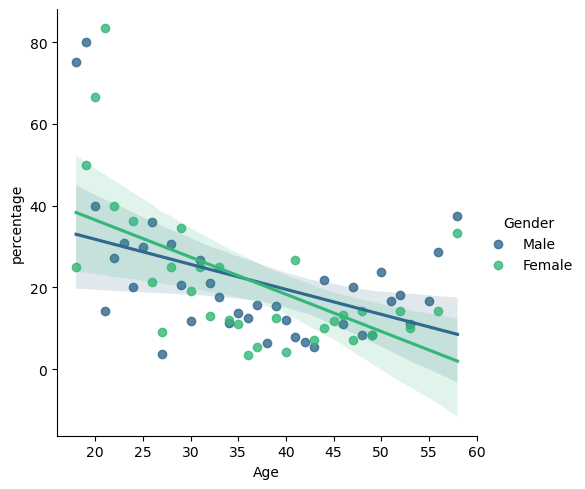

In [47]:
sns.lmplot(data=merged_data, x='Age', y='percentage', hue='Gender',palette='viridis')

- **Scatterplot and table Observation**: As age increases percentage of attrition to total counts dereases at some age then increases again between 55 and 60. Also, Higher attrition percentages are from Females.

<Axes: xlabel='Age', ylabel='Count'>

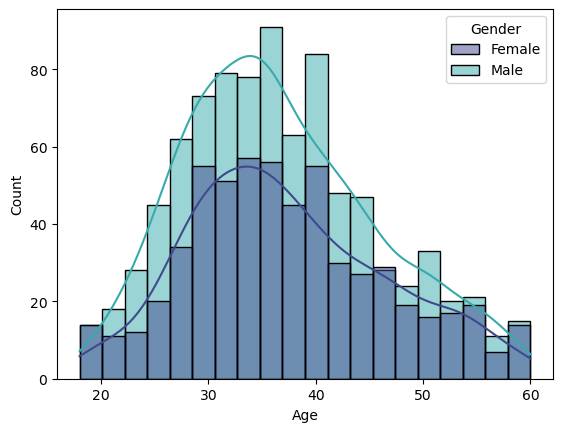

In [48]:
sns.histplot(data=df, x='Age', hue='Gender', bins=20, kde=True,palette='mako')

- **Histplot observation**: The plot shows that in the original data the majority of employees are between 30 and 40 years old in both males and females , However, females count are much higher than male counts overall

<Axes: xlabel='Age', ylabel='count'>

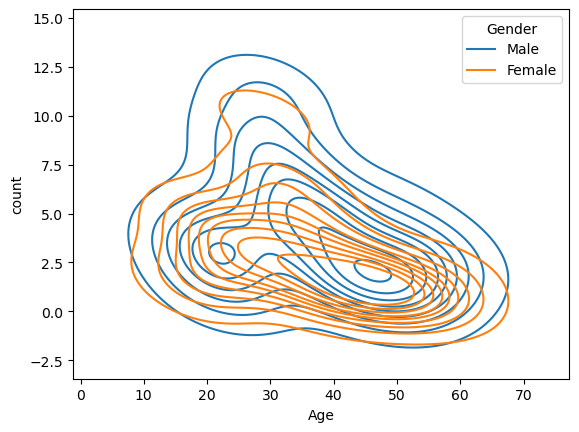

In [49]:
sns.kdeplot(data=gender_age_attrition,x='Age',y='count',hue='Gender')

- **2D Kde plot observation**: Higher intensity in Females indicates higher Attrition counts between 30 and 50 years old. While males have high attrition counts between 40 and 50.

In [50]:
px.density_heatmap(gender_age_attrition, x='Age', y='count',color_continuous_scale='viridis')

- **Density heatmap observation**: the density heatmap shows that overall age between 40 and 50 witnessed the highest attrition counts

## 2. How Is Attrition Affected by business travels?

In [51]:
df[['Attrition','BusinessTravel']]

Attrition     BusinessTravel
0          Yes      Travel_Rarely
1           No  Travel_Frequently
2          Yes      Travel_Rarely
3           No  Travel_Frequently
4           No      Travel_Rarely
...        ...                ...
1465        No  Travel_Frequently
1466        No      Travel_Rarely
1467        No      Travel_Rarely
1468        No  Travel_Frequently
1469        No      Travel_Rarely

[1470 rows x 2 columns]

- check how many unique values are present in bussiness travel

In [52]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [53]:
value_counts_Rarely= df[df['BusinessTravel']=='Travel_Rarely']['Attrition'].value_counts()
value_counts_Rarely

No     887
Yes    156
Name: Attrition, dtype: int64

In [54]:
value_counts_Freq= df[df['BusinessTravel']=='Travel_Frequently']['Attrition'].value_counts()
value_counts_Freq

No     208
Yes     69
Name: Attrition, dtype: int64

In [55]:
value_counts_Non= df[df['BusinessTravel']=='Non-Travel']['Attrition'].value_counts()
value_counts_Non

No     138
Yes     12
Name: Attrition, dtype: int64

In [56]:
ratio_yes_Rarely =value_counts_Rarely['Yes']/df['BusinessTravel'].value_counts()['Travel_Rarely']*100
ratio_yes_Rarely

14.956855225311601

In [57]:
ratio_yes_Freq =value_counts_Freq['Yes']/df['BusinessTravel'].value_counts()['Travel_Frequently']*100
ratio_yes_Freq

24.90974729241877

In [59]:
ratio_yes_Non =value_counts_Non['Yes']/df['BusinessTravel'].value_counts()['Non-Travel']*100
ratio_yes_Non

8.0

In [60]:
contingency_table = pd.crosstab(df['BusinessTravel'], df['Attrition'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square value:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square value: 24.182413685655174
p-value: 5.608614476449931e-06
Degrees of freedom: 2
Expected frequencies: [[125.81632653  24.18367347]
 [232.34081633  44.65918367]
 [874.84285714 168.15714286]]


- **Ans(2): Employees who travel frequently leave the company more than who travel rarely or don't travel at all . Also ,The chi-square value and the associated very small p-value indicate that there is a significant relationship between "Business Travel" and "Attrition."**

***Distance From Home on Attrition: Q3 , Q33*** 

## 3. what is effect of the distance from home on attrition ?

In [61]:
df['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [62]:
df[['Attrition','DistanceFromHome']]

Attrition  DistanceFromHome
0          Yes                 1
1           No                 8
2          Yes                 2
3           No                 3
4           No                 2
...        ...               ...
1465        No                23
1466        No                 6
1467        No                 4
1468        No                 2
1469        No                 8

[1470 rows x 2 columns]

In [63]:
df2[['Attrition','DistanceFromHome']]

Attrition  DistanceFromHome
0             1                 1
1             0                 8
2             1                 2
3             0                 3
4             0                 2
...         ...               ...
1465          0                23
1466          0                 6
1467          0                 4
1468          0                 2
1469          0                 8

[1470 rows x 2 columns]

In [64]:
new_df_categorical3= df2[['Attrition','DistanceFromHome']]
new_df_categorical3.corr()

Attrition  DistanceFromHome
Attrition          1.000000          0.077924
DistanceFromHome   0.077924          1.000000

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

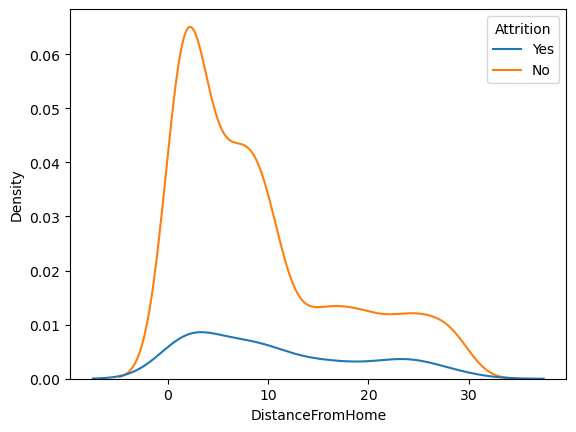

In [65]:
sns.kdeplot(data=df, x= 'DistanceFromHome', hue = 'Attrition')

In [66]:
df[df['Attrition']=='No']['DistanceFromHome'].mean()

8.915652879156529

In [67]:
df[df['Attrition']=='Yes']['DistanceFromHome'].mean()

10.632911392405063

In [68]:
px.box(df, y="DistanceFromHome", color='Attrition')

- **When Distance from home is within 0 to 10 metres , employees were less likely to leave the company however, more employees left the company when distance increased more than 30.**

- **The average distance from home of employees who left was 10.6 while the average of those who stayed was 8.9**

- **The median distance from home of employees who left was 9 while the median of those who stayed was 7**

- **75% of the distance of employees who left is 17 , while it was 13 for the other group**

--->**Ans(3) : As distance from home increased more employees are likely to leave the company**

## 33. People who live more than 25 minutes away from work tend to be less happy than those who don't. Lets see whether this is the case.

In [69]:
df[['JobSatisfaction','DistanceFromHome']]

JobSatisfaction  DistanceFromHome
0                   4                 1
1                   2                 8
2                   3                 2
3                   3                 3
4                   2                 2
...               ...               ...
1465                4                23
1466                1                 6
1467                2                 4
1468                2                 2
1469                3                 8

[1470 rows x 2 columns]

In [71]:
Distance_Satisfaction=df.groupby(['DistanceFromHome'])['JobSatisfaction'].value_counts().reset_index(name='count')
Distance_Satisfaction

DistanceFromHome  JobSatisfaction  count
0                   1                4     68
1                   1                3     58
2                   1                1     49
3                   1                2     33
4                   2                4     78
..                ...              ...    ...
111                28                2      3
112                29                4      9
113                29                3      8
114                29                2      6
115                29                1      4

[116 rows x 3 columns]

Text(0.5, 0, 'distance from home')

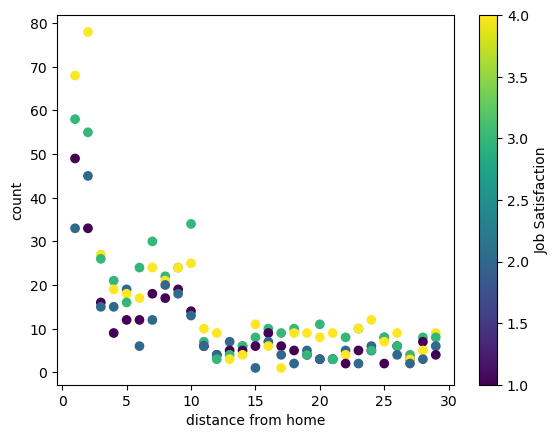

In [72]:
scatter=plt.scatter(Distance_Satisfaction['DistanceFromHome'],Distance_Satisfaction['count'],c=Distance_Satisfaction['JobSatisfaction'] )
cbar = plt.colorbar(scatter)
cbar.set_label('Job Satisfaction')
plt.ylabel('count')
plt.xlabel('distance from home')

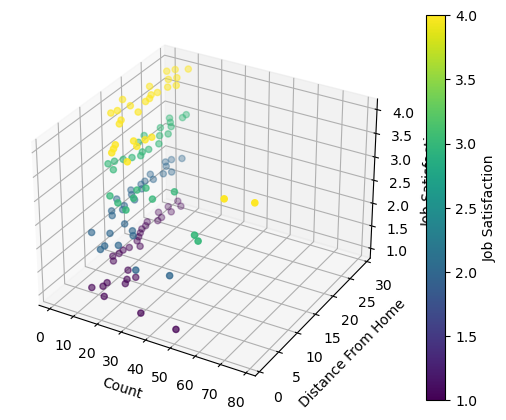

In [73]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(Distance_Satisfaction['count'], Distance_Satisfaction['DistanceFromHome'],
                     Distance_Satisfaction['JobSatisfaction'], c=Distance_Satisfaction['JobSatisfaction'])

ax.set_xlabel('Count')
ax.set_ylabel('Distance From Home')
ax.set_zlabel('Job Satisfaction')

cbar = fig.colorbar(scatter)
cbar.set_label('Job Satisfaction')

plt.show()


- **Ans(33): From the plots observation, it is obvious that Distance from home is highly correlated with satisfaction which represents happiness . Therefore distance is negatively correlated with happiness or satisfaction**

***Department Impact on Attrition: Q4, 15,26***

## 4. What is the most Department of attritions ?

## 26. Which business unit faces the attrition problem?

In [74]:
df[['Attrition','Department']]

Attrition              Department
0          Yes                   Sales
1           No  Research & Development
2          Yes  Research & Development
3           No  Research & Development
4           No  Research & Development
...        ...                     ...
1465        No  Research & Development
1466        No  Research & Development
1467        No  Research & Development
1468        No                   Sales
1469        No  Research & Development

[1470 rows x 2 columns]

In [77]:
department_attrition_counts = df.groupby('Department')['Attrition'].value_counts().reset_index(name='count')
department_attrition_counts

Department Attrition  count
0         Human Resources        No     51
1         Human Resources       Yes     12
2  Research & Development        No    828
3  Research & Development       Yes    133
4                   Sales        No    354
5                   Sales       Yes     92

In [78]:
department_attrition_counts[department_attrition_counts['Attrition']=='Yes']

Department Attrition  count
1         Human Resources       Yes     12
3  Research & Development       Yes    133
5                   Sales       Yes     92

In [79]:
department_attrition_counts['Percentage']=0

In [80]:
for i , Dep in enumerate(department_attrition_counts['Department']):
        department_attrition_counts['Percentage'][i]= (department_attrition_counts['count'][i]/(df['Department'] == Dep).sum())*100

/tmp/ipykernel_32/568842060.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
department_attrition_counts

Department Attrition  count  Percentage
0         Human Resources        No     51   80.952381
1         Human Resources       Yes     12   19.047619
2  Research & Development        No    828   86.160250
3  Research & Development       Yes    133   13.839750
4                   Sales        No    354   79.372197
5                   Sales       Yes     92   20.627803

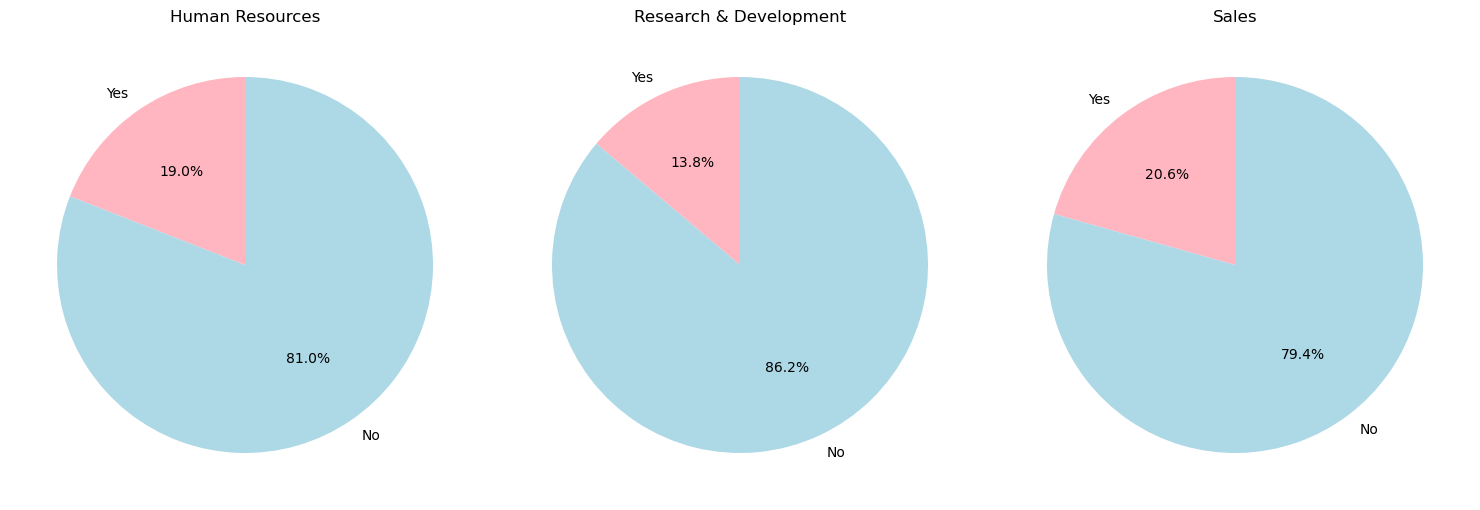

In [82]:
departments = ["Human Resources", "Research & Development", "Sales"]
yes_counts = [12, 133, 92]
no_counts = [51, 828, 354]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, department in enumerate(departments):
    sizes = [yes_counts[i], no_counts[i]]
    labels = ["Yes", "No"]
    axs[i].pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=["lightpink", "lightblue"])
    axs[i].set_title(department)

plt.tight_layout()
plt.show()


**Ans(4 & 26) : The most department(or Business unit) of attritions is Sales because 20% of Sales employees left the company . However the department having the most number of attritions is Research& Development**

## 15.Does the Department of work impact attrition?

<Axes: xlabel='Department', ylabel='count'>

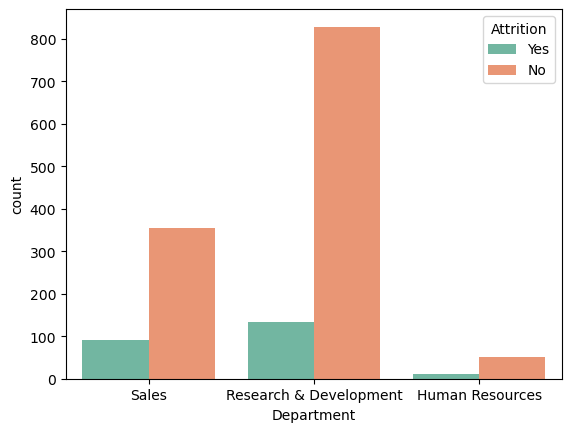

In [83]:
sns.countplot(data=df, x='Department', hue='Attrition', palette='Set2')

In [84]:
from scipy import stats
contingency_table = pd.crosstab(df2['Department'], df2['Attrition'])

point_biserial_corr = stats.pointbiserialr(df2['Department'], df2['Attrition'])

print("Point Biserial Correlation Coefficient:", point_biserial_corr.correlation)
print("P-value:", point_biserial_corr.pvalue)

Point Biserial Correlation Coefficient: 0.06399059633809055
P-value: 0.01413301807680459


**Ans(15): According to the point biserial test the p-value is less than 0.05, which is an evidence that the observed correlation between the binary variable( Attrition) and the other variable is statistically significant. However, even though the correlation is statistically significant, the strength of the relationship is very weak (as indicated by the low correlation coefficient value). Therefore,The answer is NO**

***Years with Manager impact on Attrition: Q5, 23***

## 5.what is effect of YearsWithCurrManager on attrition ?


In [86]:
years_attrition_counts= df.groupby(['YearsWithCurrManager'])['Attrition'].value_counts().reset_index(name='count')
years_attrition_counts= years_attrition_counts.sort_values("count",ascending=False)
years_attrition_counts

YearsWithCurrManager Attrition  count
4                      2        No    294
14                     7        No    185
0                      0        No    178
6                      3        No    123
16                     8        No     97
8                      4        No     87
1                      0       Yes     85
2                      1        No     65
18                     9        No     58
5                      2       Yes     50
15                     7       Yes     31
10                     5        No     27
12                     6        No     25
20                    10        No     24
22                    11        No     21
7                      3       Yes     19
24                    12        No     18
25                    13        No     14
9                      4       Yes     11
3                      1       Yes     11
17                     8       Yes     10
30                    17        No      7
19                     9       Yes      6
28                    15        No      5
11                     5       Yes      4
13                     6       Yes      4
26                    14        No      3
21                    10       Yes      3
27                    14       Yes      2
29                    16        No      2
23                    11       Yes      1

In [87]:
years_attrition_counts_yes = years_attrition_counts[years_attrition_counts['Attrition']=='Yes']
years_attrition_counts_yes

YearsWithCurrManager Attrition  count
1                      0       Yes     85
5                      2       Yes     50
15                     7       Yes     31
7                      3       Yes     19
9                      4       Yes     11
3                      1       Yes     11
17                     8       Yes     10
19                     9       Yes      6
11                     5       Yes      4
13                     6       Yes      4
21                    10       Yes      3
27                    14       Yes      2
23                    11       Yes      1

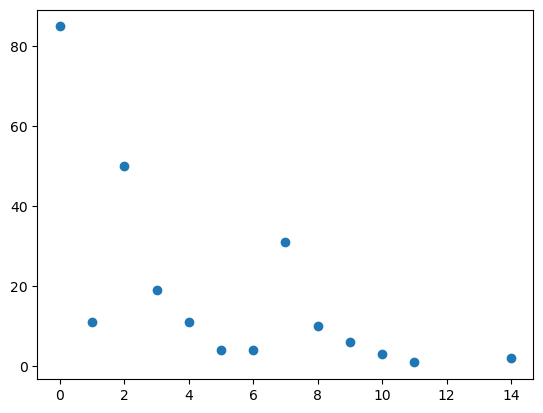

In [88]:
plt.scatter(years_attrition_counts_yes['YearsWithCurrManager'],years_attrition_counts_yes['count'] )

/tmp/ipykernel_32/1325786843.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='YearsWithCurrManager', ylabel='Density'>

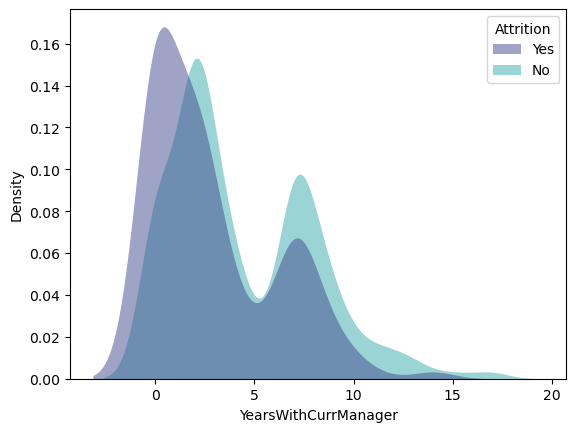

In [89]:
sns.kdeplot(data=df, x= 'YearsWithCurrManager', hue = 'Attrition',shade='True',common_norm=False, palette="mako",
   alpha=.5, linewidth=0,)

<Axes: xlabel='YearsWithCurrManager', ylabel='Count'>

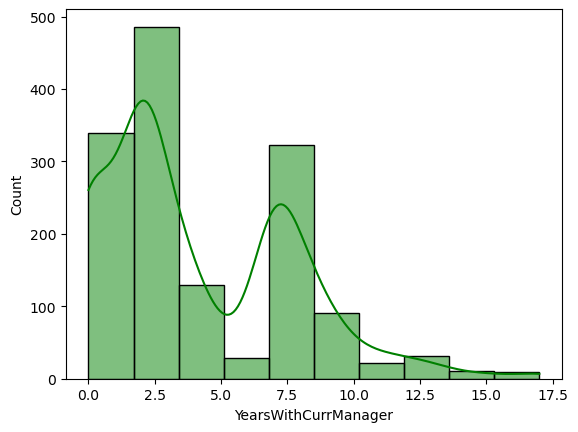

In [90]:
sns.histplot(df['YearsWithCurrManager'], bins=10, kde=True, color='green')  # Create the histogram with KDE plot

- **Histplot observation**:employees who spent from 2 to 3 years with the same manager are the most frequent in the company

**Ans(5) : As years with current manager increase number of attritions decrease and also become less frequent , which means that the employee became more stable in his current job**

## 23. Are managers a reason of people resigning ?

In [91]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [92]:
attrition_yes_data = df[df['Attrition'] == 'Yes']

YearsWCurrentManager_attrition = attrition_yes_data['YearsWithCurrManager'].value_counts().reset_index()
YearsWCurrentManager_attrition.columns = ['YearsWithCurrManager', 'AttritionCount']
YearsWCurrentManager_attrition

YearsWithCurrManager  AttritionCount
0                      0              85
1                      2              50
2                      7              31
3                      3              19
4                      1              11
5                      4              11
6                      8              10
7                      9               6
8                      5               4
9                      6               4
10                    10               3
11                    14               2
12                    11               1

<Axes: xlabel='YearsWithCurrManager', ylabel='AttritionCount'>

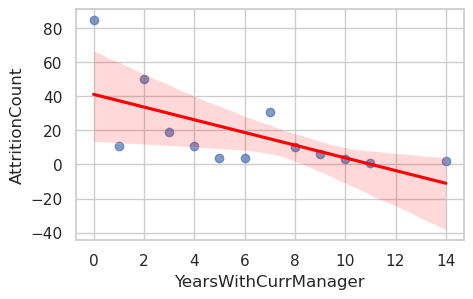

In [93]:
sns.set(style="whitegrid")

plt.figure(figsize=(5, 3))
sns.regplot(data=YearsWCurrentManager_attrition, x='YearsWithCurrManager', y='AttritionCount', scatter_kws={'alpha':0.7}, line_kws={'color':'red'})

**Ans(23): No managers are not a reason why people are resigning because as years with current manager increase attritions decrease , which means that the answer is NO, Years are negatively correlated with attrition**

## 6. What is the most job role of attritions ?

In [94]:
df[['Attrition','JobRole']]

Attrition                    JobRole
0          Yes            Sales Executive
1           No         Research Scientist
2          Yes      Laboratory Technician
3           No         Research Scientist
4           No      Laboratory Technician
...        ...                        ...
1465        No      Laboratory Technician
1466        No  Healthcare Representative
1467        No     Manufacturing Director
1468        No            Sales Executive
1469        No      Laboratory Technician

[1470 rows x 2 columns]

In [95]:
most_job_role = df[df['Attrition'] == 'Yes']['JobRole'].value_counts().reset_index()
most_job_role

index  JobRole
0      Laboratory Technician       62
1            Sales Executive       57
2         Research Scientist       47
3       Sales Representative       33
4            Human Resources       12
5     Manufacturing Director       10
6  Healthcare Representative        9
7                    Manager        5
8          Research Director        2

In [96]:
most_job_role['Percentage'] = df.groupby('JobRole')['Attrition'].transform(lambda x: (x == 'Yes').sum() / len(x) * 100)
most_job_role

index  JobRole  Percentage
0      Laboratory Technician       62   17.484663
1            Sales Executive       57   16.095890
2         Research Scientist       47   23.938224
3       Sales Representative       33   16.095890
4            Human Resources       12   23.938224
5     Manufacturing Director       10   23.938224
6  Healthcare Representative        9   23.938224
7                    Manager        5   23.938224
8          Research Director        2    6.896552

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2'),
  Text(1, 0, '5'),
  Text(2, 0, '9'),
  Text(3, 0, '10'),
  Text(4, 0, '12'),
  Text(5, 0, '33'),
  Text(6, 0, '47'),
  Text(7, 0, '57'),
  Text(8, 0, '62')])

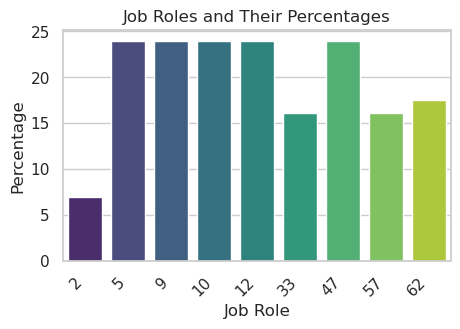

In [97]:
plt.figure(figsize=(5, 3)) 
sns.barplot(data=most_job_role, x='JobRole', y='Percentage', palette="viridis")  # You can use different color palettes

plt.title('Job Roles and Their Percentages')
plt.xlabel('Job Role')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

**Ans(6) : The Job role with total highest number of attritions is Laboratory Technician. However, The highest total number of attritions with respect to the total number of employees in a job role was in Manufacturing Director, Healthcare Representative, Manager, Human Resources, Research Scientist**

***Salary Impact on Attrition: Q7, Q14, Q22 , Q28:***

## 7. Is salary is one of the main reasons?

## 28.How much does income matter?

In [98]:
Income_attrition= df[df['Attrition'] == 'Yes']['MonthlyIncome'].reset_index()
Income_attrition= Income_attrition.sort_values('MonthlyIncome', ascending=False)
Income_attrition

index  MonthlyIncome
87     568          19859
121    749          19845
10      45          19545
92     595          19246
151    913          18824
..     ...            ...
150    911           1118
27     177           1102
225   1365           1091
221   1338           1081
79     513           1009

[237 rows x 2 columns]

Text(0.5, 0, 'MonthlyIncome')

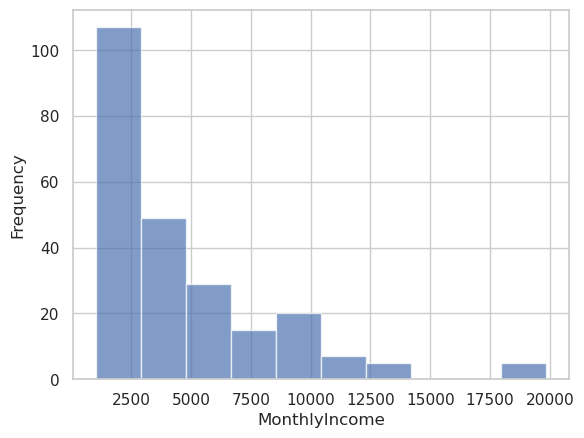

In [99]:
df[df['Attrition'] == 'Yes']['MonthlyIncome'].plot(kind='hist', alpha=0.7)
plt.xlabel('MonthlyIncome')            

- To view whether salary is one of the main reasons or not we need to plot a correlation matrix between attrition and all other columns :

In [100]:
from sklearn import preprocessing
  
df_categorical = df2.select_dtypes(include='object')
label_encoder = preprocessing.LabelEncoder()
for column in df_categorical.columns:
    df2[column]= label_encoder.fit_transform(df2[column])

In [101]:
df2.corr()['Attrition'].sort_values(ascending= False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

In [102]:
corr_attrition = abs(df2.corr()['Attrition'])
corr_attrition = corr_attrition.sort_values(ascending = False)
corr_attrition= corr_attrition.head(8)
corr_attrition

Attrition             1.000000
OverTime              0.246118
TotalWorkingYears     0.171063
JobLevel              0.169105
MaritalStatus         0.162070
YearsInCurrentRole    0.160545
MonthlyIncome         0.159840
Age                   0.159205
Name: Attrition, dtype: float64

In [103]:
corr_attrition= corr_attrition.reset_index()
corr_attrition

index  Attrition
0           Attrition   1.000000
1            OverTime   0.246118
2   TotalWorkingYears   0.171063
3            JobLevel   0.169105
4       MaritalStatus   0.162070
5  YearsInCurrentRole   0.160545
6       MonthlyIncome   0.159840
7                 Age   0.159205

In [104]:
corr_attrition= pd.DataFrame(df2[['Attrition','OverTime','TotalWorkingYears','JobLevel', 'MaritalStatus','YearsInCurrentRole','MonthlyIncome','Age']])
corr_attrition

Attrition  OverTime  TotalWorkingYears  JobLevel  MaritalStatus  \
0             1         1                  8         2              2   
1             0         0                 10         2              1   
2             1         1                  7         1              2   
3             0         1                  8         1              1   
4             0         0                  6         1              1   
...         ...       ...                ...       ...            ...   
1465          0         0                 17         2              1   
1466          0         0                  9         3              1   
1467          0         1                  6         2              1   
1468          0         0                 17         2              1   
1469          0         0                  6         2              1   

      YearsInCurrentRole  MonthlyIncome  Age  
0                      4           5993   41  
1                      7           5130   49  
2                      0           2090   37  
3                      7           2909   33  
4                      2           3468   27  
...                  ...            ...  ...  
1465                   2           2571   36  
1466                   7           9991   39  
1467                   2           6142   27  
1468                   6           5390   49  
1469                   3           4404   34  

[1470 rows x 8 columns]

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



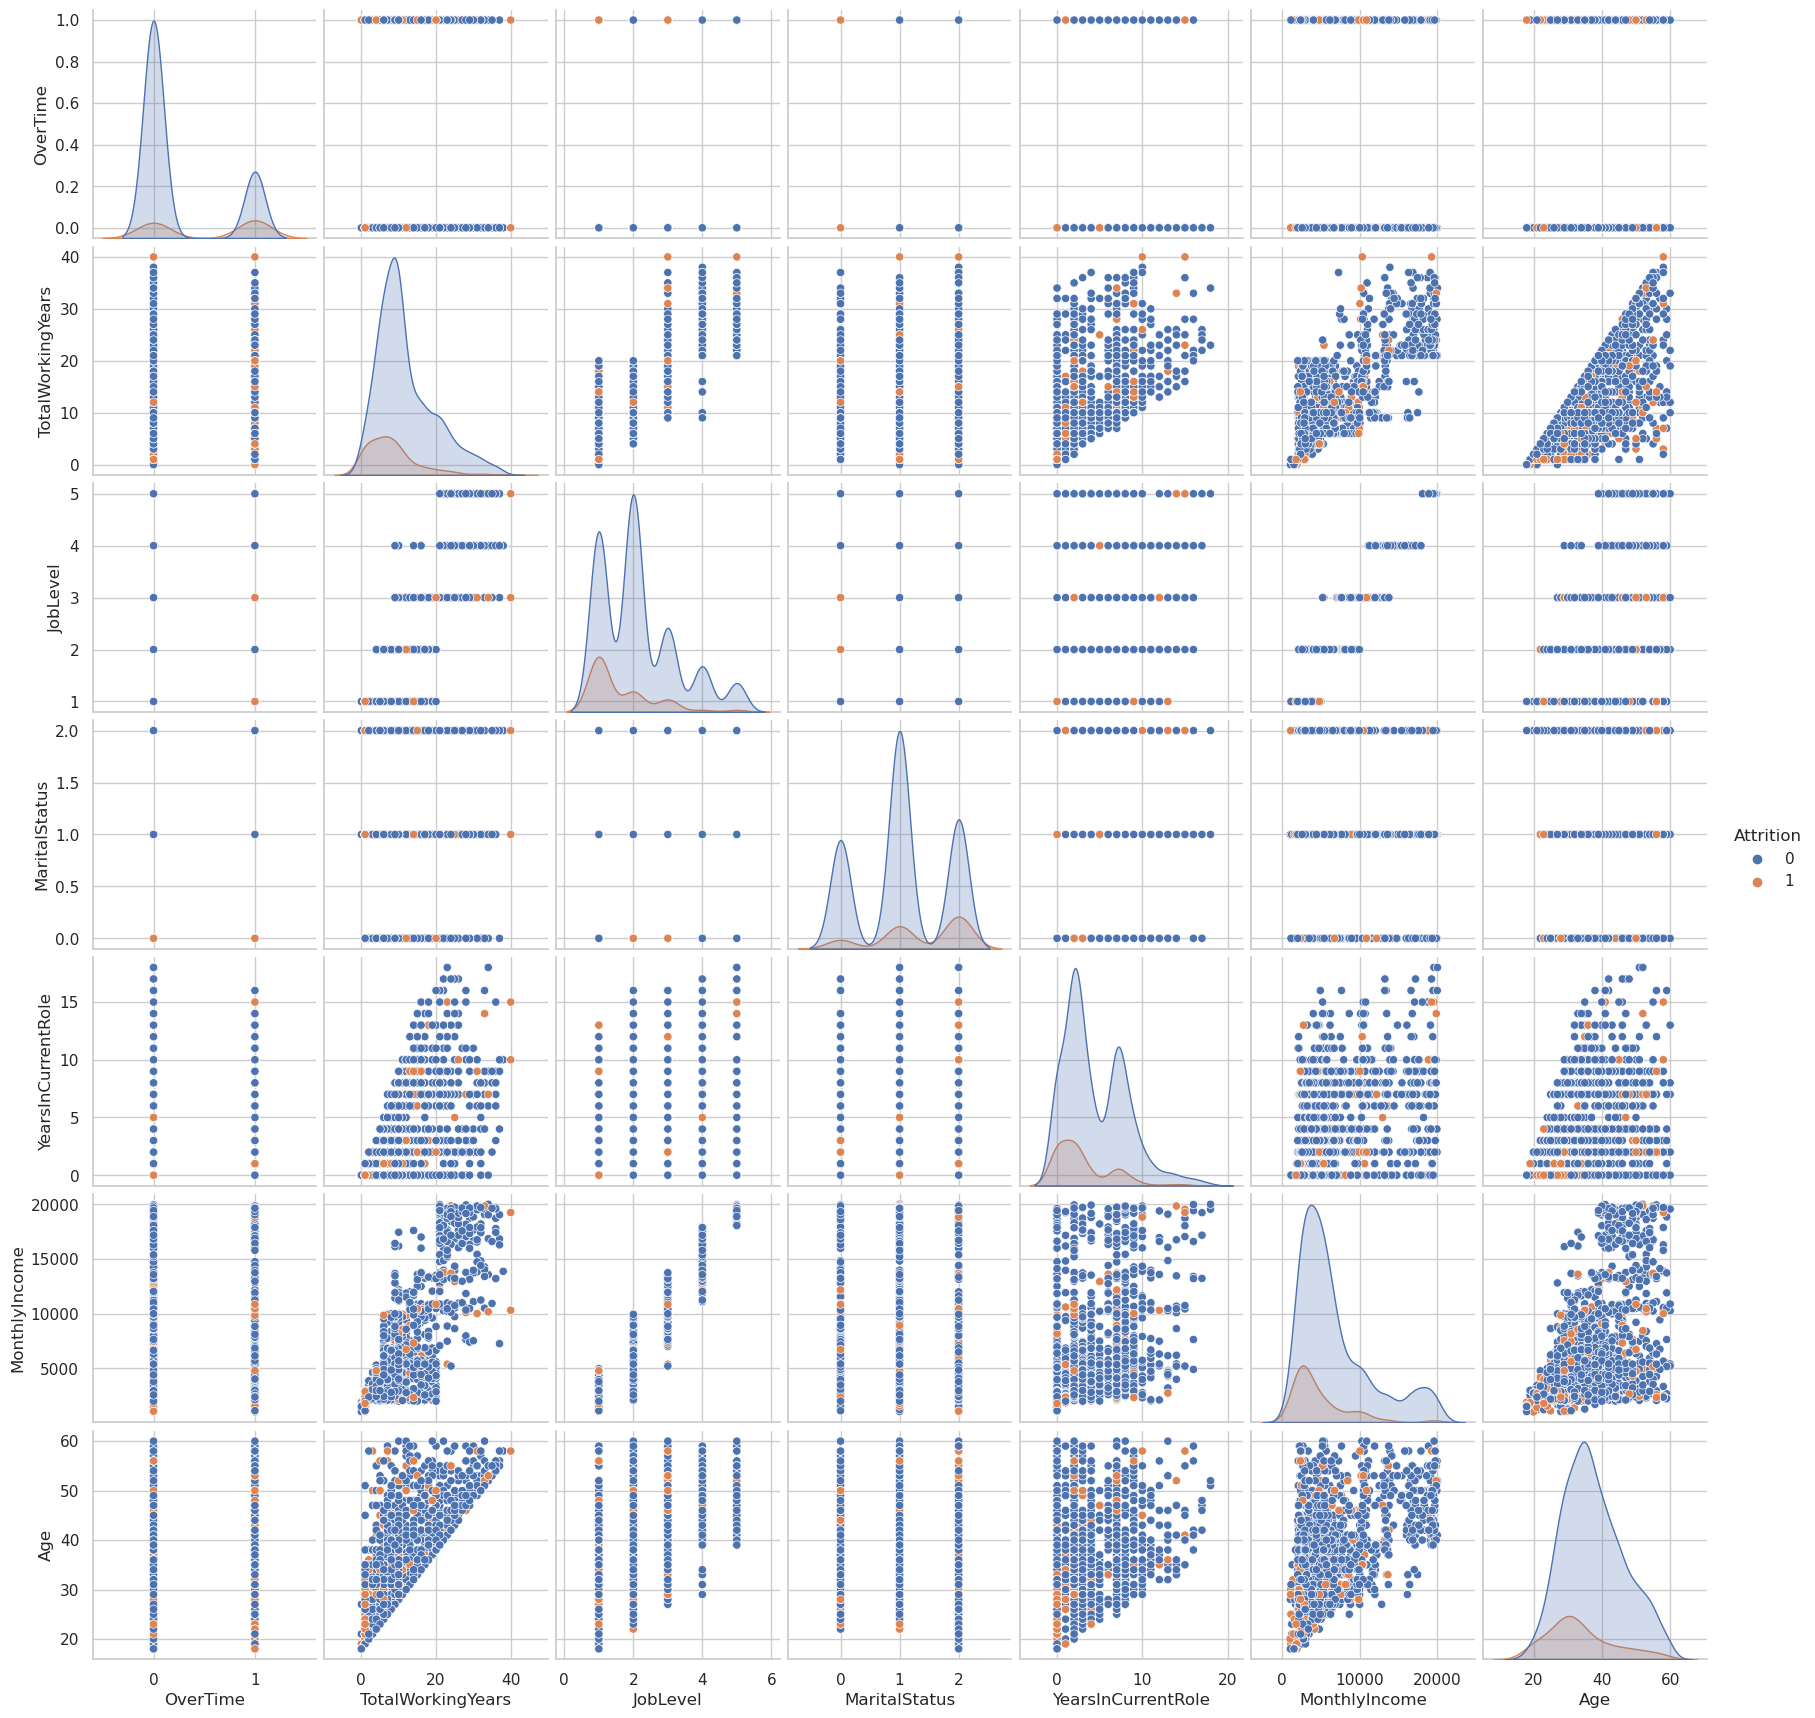

In [105]:
sns.pairplot(corr_attrition, hue='Attrition', diag_kind='kde')

- To measure correlation of attrition counts against all features (which is more accurate):

In [106]:
df_numerical= df.select_dtypes(include=['int64'])
df_numerical['Attrition']=df['Attrition']

In [108]:
attrition_grouped = {}
for column in df_numerical.columns:
    if column != 'Attrition':  
        correlation_df = df_numerical.groupby([column])['Attrition'].value_counts().reset_index(name='count').sort_values('count',ascending=False)
        attrition_counts = correlation_df[correlation_df['Attrition'] == 'Yes']
        attrition_grouped[column] = attrition_counts

In [109]:
attrition_correlations={}
for key,value in attrition_grouped.items():
    attrition_correlations[key]=attrition_grouped[key][key].corr(attrition_grouped[key]['count'])

In [110]:
attrition_correlations

{'Age': -0.4475400774899958,
 'DailyRate': -0.008622035065977767,
 'DistanceFromHome': -0.6755966787050756,
 'Education': -0.17249221622545677,
 'EmployeeNumber': nan,
 'EnvironmentSatisfaction': -0.18231152682142973,
 'HourlyRate': -0.0292295515103354,
 'JobInvolvement': 0.023119904337454967,
 'JobLevel': -0.8960752056893142,
 'JobSatisfaction': -0.1559204385071,
 'MonthlyIncome': -0.062042721903099944,
 'MonthlyRate': -0.04921994318182203,
 'NumCompaniesWorked': -0.5126048281890078,
 'PercentSalaryHike': -0.916086675115195,
 'PerformanceRating': -0.9999999999999999,
 'RelationshipSatisfaction': 0.5472891591552071,
 'StockOptionLevel': -0.897943100440428,
 'TotalWorkingYears': -0.6500687858702476,
 'TrainingTimesLastYear': -0.19350752698089127,
 'WorkLifeBalance': 0.2033013106281392,
 'YearsAtCompany': -0.6551457335625238,
 'YearsInCurrentRole': -0.644646094468043,
 'YearsSinceLastPromotion': -0.640157984251927,
 'YearsWithCurrManager': -0.6390125449468268}

In [111]:
abs_correlations = {key: abs(value) for key, value in attrition_correlations.items()}

sorted_correlations = dict(sorted(abs_correlations.items(), key=lambda item: item[1], reverse=True))
sorted_correlations

{'EmployeeNumber': nan,
 'PerformanceRating': 0.9999999999999999,
 'PercentSalaryHike': 0.916086675115195,
 'StockOptionLevel': 0.897943100440428,
 'JobLevel': 0.8960752056893142,
 'DistanceFromHome': 0.6755966787050756,
 'YearsAtCompany': 0.6551457335625238,
 'TotalWorkingYears': 0.6500687858702476,
 'YearsInCurrentRole': 0.644646094468043,
 'YearsSinceLastPromotion': 0.640157984251927,
 'YearsWithCurrManager': 0.6390125449468268,
 'RelationshipSatisfaction': 0.5472891591552071,
 'NumCompaniesWorked': 0.5126048281890078,
 'Age': 0.4475400774899958,
 'WorkLifeBalance': 0.2033013106281392,
 'TrainingTimesLastYear': 0.19350752698089127,
 'EnvironmentSatisfaction': 0.18231152682142973,
 'Education': 0.17249221622545677,
 'JobSatisfaction': 0.1559204385071,
 'MonthlyIncome': 0.062042721903099944,
 'MonthlyRate': 0.04921994318182203,
 'HourlyRate': 0.0292295515103354,
 'JobInvolvement': 0.023119904337454967,
 'DailyRate': 0.008622035065977767}

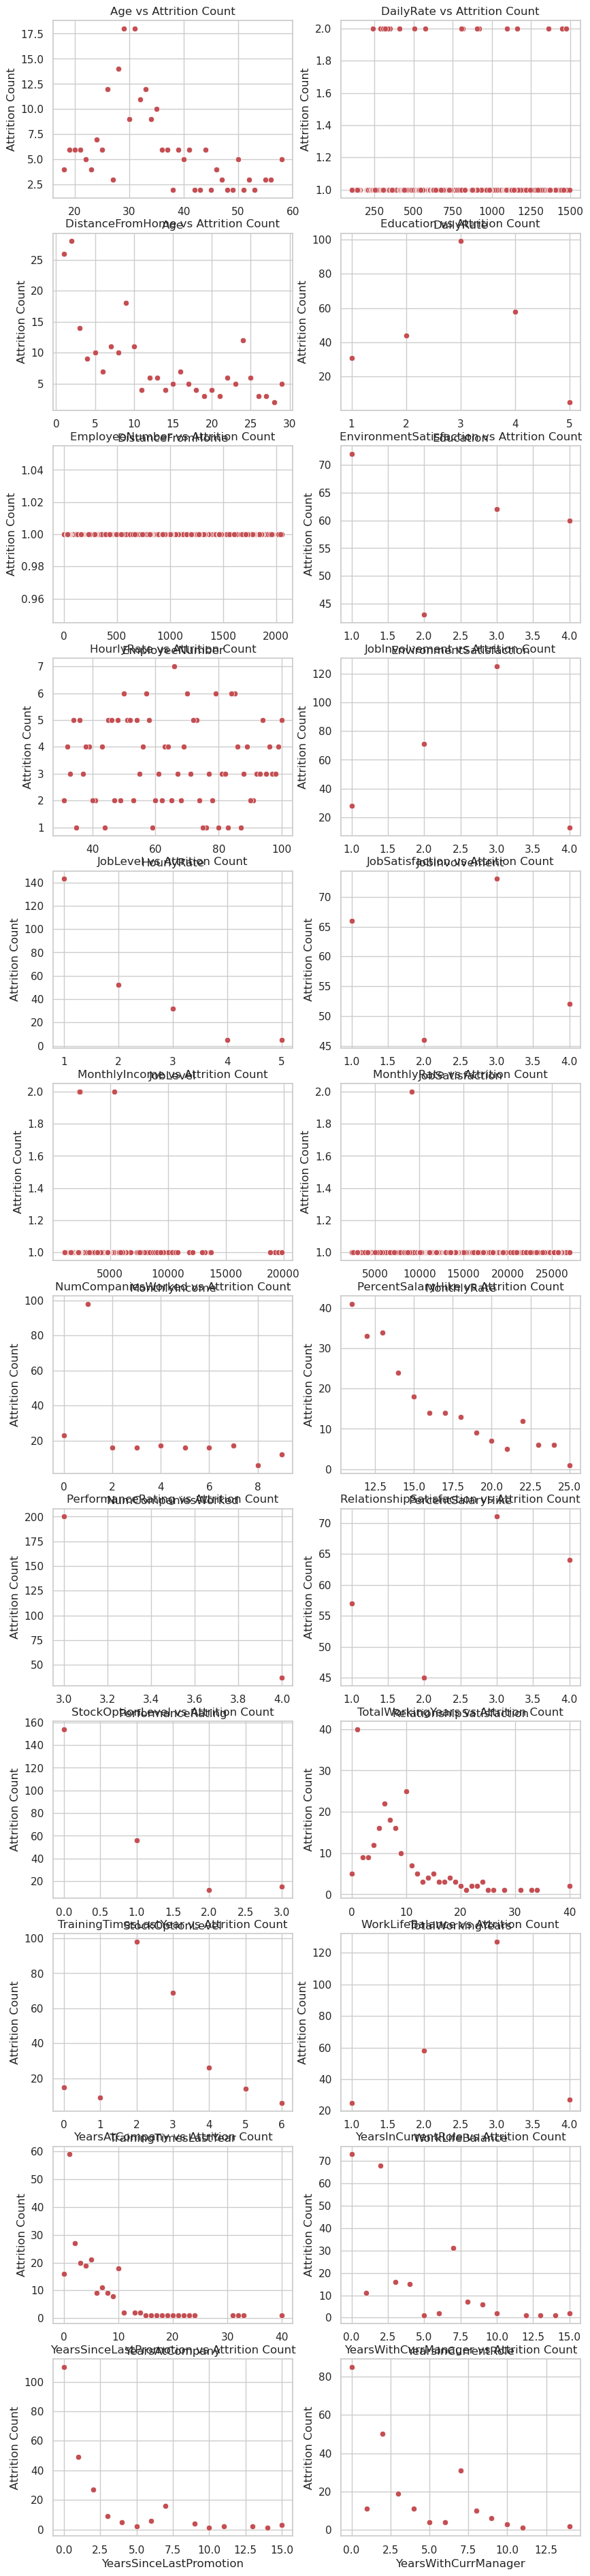

In [112]:
num_cols = len(attrition_grouped)
num_rows = (num_cols + 1) // 2  
fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows * 4))

axes = axes.flatten()

for i, (column, attrition_counts) in enumerate(attrition_grouped.items()):
    ax = axes[i]
    
    sns.scatterplot(x=column, y='count', data=attrition_counts, ax=ax, color='r')
    ax.set_title(f'{column} vs Attrition Count')
    ax.set_ylabel('Attrition Count')

- Scatter Plot Observation: Hence, From the scatter plot and correlations between attrition counts and numerical columns ,Highly correlated variables with attrition counts are : PerformanceRating, PercentSalaryHike,StockOptionLevel, JobLevel, DistanceFromHome, YearsAtCompany, TotalWorkingYears, YearsInCurrentRole ,YearsSinceLastPromotion, YearsWithCurrManager, RelationshipSatisfaction, NumCompaniesWorked

## 14. Is income the main factor towards employee attrition?

<Figure size 500x500 with 0 Axes>

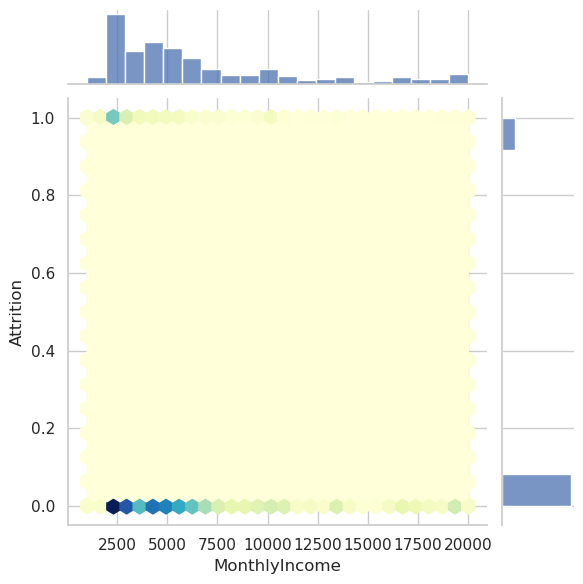

In [113]:
plt.figure(figsize=(5, 5))
sns.jointplot(
    data=df2, x=df2['MonthlyIncome'], y=df2['Attrition'],
    kind='hex', cmap='YlGnBu'
)

- **JointPlot Observation**: The middle plot is similar to a scatter plot which shows the relationship between income and attrition (non linear of course), while the plot on the horizontal represent the density of monthly icome showing higher density between 2500 and 5000 . The plot on the vertical represent the density of the attrition which in our case will be similar to a bar plot showing only the value counts of 0 and 1 attrition 

**Ans(7 & 14& 28): The frequency of attritions is extremely high for low monthly incomes that lie between 1000 and 2500, 
Also,  if a threshold is applied for the most correlated variables with attrition or the variables that are considered to be the main reason with reason . Then, OverTime, TotalWorkingYears, JobLevel, MaritalStatus, YearsInCurrRole, MonthlyIncome are considered the main reasons so MonthlyIncome is one of the main reasons but it's NOT the first main reason of attrition. It is also worth mentioning that when monthly income was studied against attrition counts it showed a very low correlation. Therefore, The answer is NO salary or income are not the main reasons**

## 22. Does hike percentage impact Attrition?

In [114]:
df['PercentSalaryHike']

0       11
1       23
2       15
3       11
4       12
        ..
1465    17
1466    15
1467    20
1468    14
1469    12
Name: PercentSalaryHike, Length: 1470, dtype: int64

In [115]:
df2.corr()['Attrition']['PercentSalaryHike']

-0.01347820205743911

In [118]:
PercentSalaryHike_attrition=df.groupby(['PercentSalaryHike'])['Attrition'].value_counts().reset_index(name='count').sort_values('count',ascending=False)
PercentSalaryHike_attrition=PercentSalaryHike_attrition[PercentSalaryHike_attrition['Attrition']=='Yes']
PercentSalaryHike_attrition

PercentSalaryHike Attrition  count
1                  11       Yes     41
5                  13       Yes     34
3                  12       Yes     33
7                  14       Yes     24
9                  15       Yes     18
13                 17       Yes     14
11                 16       Yes     14
15                 18       Yes     13
23                 22       Yes     12
17                 19       Yes      9
19                 20       Yes      7
25                 23       Yes      6
27                 24       Yes      6
21                 21       Yes      5
29                 25       Yes      1

<Axes: xlabel='PercentSalaryHike', ylabel='Attrition'>

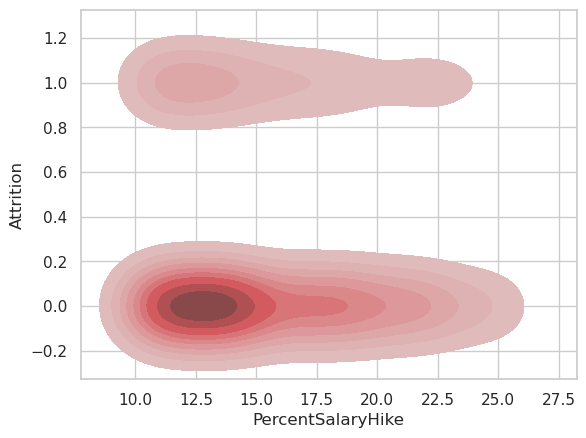

In [119]:
sns.kdeplot(data =df2, x= 'PercentSalaryHike', y='Attrition',color='r',fill='True')

- **2D Kde plot observation**: higher color intensity at the Yes attrition represents high percentsalaryhike in the region from 11 to 13 . Therefore, when percentage salary hike increases attrition decreases significantly

Text(0, 0.5, 'Attrition count')

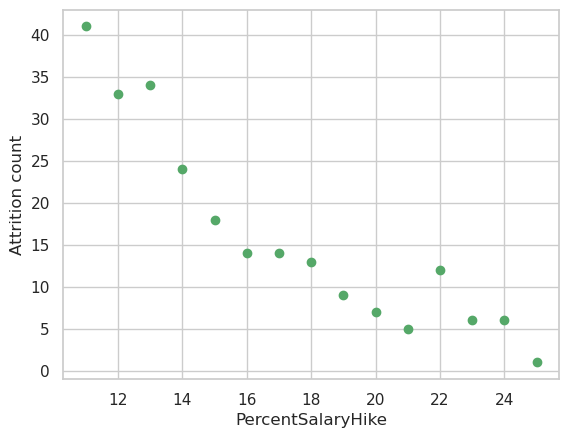

In [120]:
plt.scatter(PercentSalaryHike_attrition['PercentSalaryHike'],PercentSalaryHike_attrition['count'],color='g')
plt.xlabel('PercentSalaryHike')
plt.ylabel('Attrition count')

**Ans(22): As percent salary hike increases number of attritions decrease which implies a strong negative correlation between both**

***Education Impact on Attrition: Q3, 29,30***

## 8. Do Education Field play a role?

## 30.Which Education Field is more likely to leave?

In [121]:
df['EducationField']

0       Life Sciences
1       Life Sciences
2               Other
3       Life Sciences
4             Medical
            ...      
1465          Medical
1466          Medical
1467    Life Sciences
1468          Medical
1469          Medical
Name: EducationField, Length: 1470, dtype: object

In [123]:
Education_attrition= df.groupby(['EducationField'])['Attrition'].value_counts().reset_index(name='count').sort_values('count',ascending= False)
Education_attrition= Education_attrition[Education_attrition['Attrition']=='Yes']
Education_attrition

EducationField Attrition  count
3      Life Sciences       Yes     89
7            Medical       Yes     63
5          Marketing       Yes     35
11  Technical Degree       Yes     32
9              Other       Yes     11
1    Human Resources       Yes      7

- Null Hypothesis (H0): There is no relationship between Education Field and Attrition.

- Alternative Hypothesis (Ha): There is an association or relationship between the "Education Field" and "Attrition" variables in the population.

In [124]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['EducationField'], df['Attrition'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared value: {chi2}")
print(f"P-value: {p}")

Chi-Squared value: 16.024674119585427
P-value: 0.006773980139025212


- Since that The p-value < 0.05 suggests that the observed association between Education Field and Attrition is unlikely to have occurred by random chance. Therefore, I will reject the null hypothesis.

<Axes: xlabel='Attrition', ylabel='EducationField'>

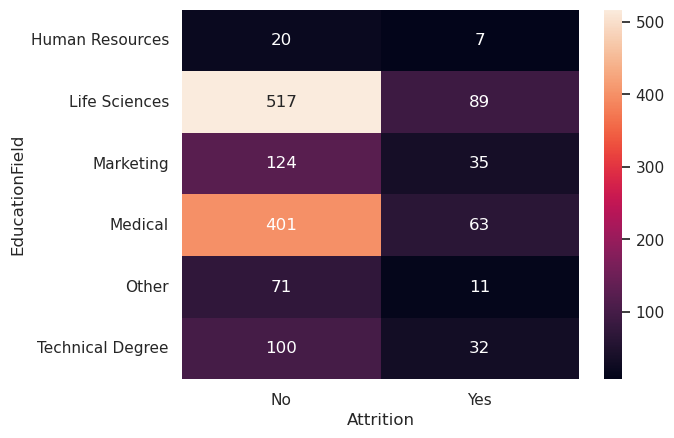

In [125]:
cross_tab = pd.crosstab(df['EducationField'], df['Attrition'])
sns.heatmap(cross_tab, annot=True, fmt='d')

- **Heatmap observation**: Lighter cells indicate lower counts , ie: Life sciences have the highest yes counts, that's why it's lighter than all other cells in the yes column , which means stronger relationship between this field and attrition being yes.

**Ans(8 & 30 ) : Yes, it does play a role because based on the p-value being below 0.05, we might conclude that there is a statistically significant association between Education Field and Attrition. This implies that the two variables are not independent and that there is some form of relationship between the education field and attrition status. The most education field likely to leave is Life sciences because it has the higher attrition counts**

## 29. Are more educated people more likely to leave?

In [126]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

- According to the correlation numbers above , Education doesn't highly affect attrition 

In [127]:
attrition_grouped['Education']

Education Attrition  count
5          3       Yes     99
7          4       Yes     58
3          2       Yes     44
1          1       Yes     31
9          5       Yes      5

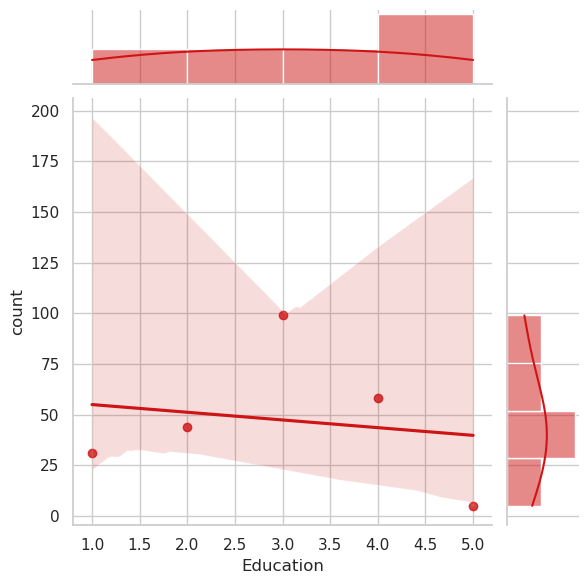

In [128]:
sns.jointplot( x= attrition_grouped['Education']['Education'],y= attrition_grouped['Education']['count'] , kind="reg", color="#ce1414")

- **jointplot observation**: There's no correlation between education and attrition counts, The plot also shows that the distribution of education is more frequent between 5 and 4

**Ans(29): No Highly Educated people with education of 5 have the lowest attrition counts . Therefore, Education rank doesn't imply high attrition counts**

## 9. Do overtime stresses employees and makes them have to leave?

In [129]:
df['OverTime']

0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
1465     No
1466     No
1467    Yes
1468     No
1469     No
Name: OverTime, Length: 1470, dtype: object

- From the above correlation plot , the highest correlated variable with attrition was overtime , which means that overtime plays an important role in attrition. ie, There's a strong relationship between overtime and attrition

In [131]:
overTime_Attrition= df.groupby(['OverTime'])['Attrition'].value_counts().reset_index(name='count')
overTime_Attrition

OverTime Attrition  count
0       No        No    944
1       No       Yes    110
2      Yes        No    289
3      Yes       Yes    127

/tmp/ipykernel_32/2739764942.py:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



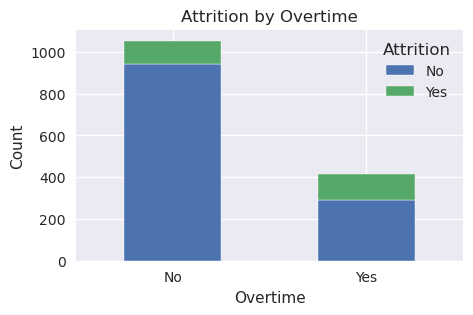

In [132]:
pivot_df = overTime_Attrition.pivot(index='OverTime', columns='Attrition', values='count')

plt.style.use('seaborn')

pivot_df.plot(kind='bar', stacked=True, figsize=(5, 3))

plt.title('Attrition by Overtime')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Attrition')

<Axes: xlabel='Attrition', ylabel='OverTime'>

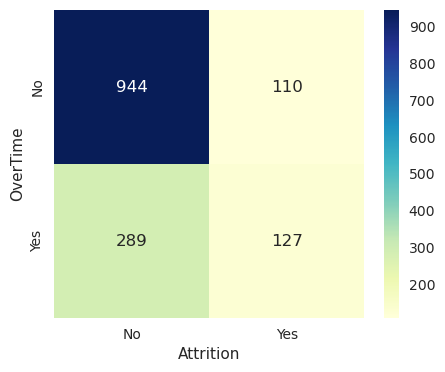

In [133]:
plt.figure(figsize=(5, 4))
sns.heatmap(data=pivot_df, annot=True, fmt='d', cmap='YlGnBu', cbar=True)

In [134]:
127/416 *100

30.528846153846157

**Ans(9) : 30% of employees who work overtime leave their jobs, Which is a large percentage . Therefore, the answer is Yes.**

***Environment Impact on Attrition: Q10 ,16***

## 10. Is it possible that employees are leaving because of the work environment? 

## 16. How does the environment satisfaction impact attrition?

In [135]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

- Observation: Environment Satisfaction is rated from 1 to 4 with 3 having the highest counts and 1 having the lowest counts

In [137]:
Env_Attrtion= df.groupby(['EnvironmentSatisfaction'])['Attrition'].value_counts().reset_index(name='count')
Env_Attrtion

EnvironmentSatisfaction Attrition  count
0                        1        No    212
1                        1       Yes     72
2                        2        No    244
3                        2       Yes     43
4                        3        No    391
5                        3       Yes     62
6                        4        No    386
7                        4       Yes     60

<Axes: xlabel='EnvironmentSatisfaction', ylabel='Density'>

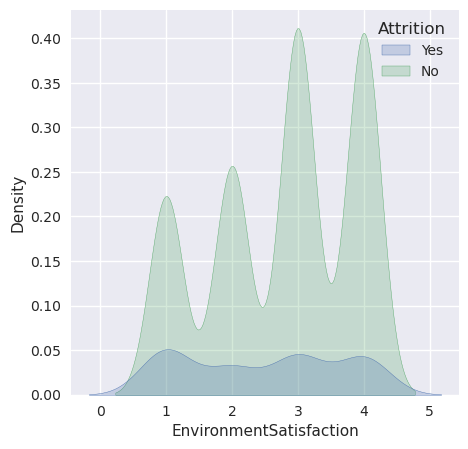

In [138]:
plt.figure(figsize=(5, 5))
sns.kdeplot(data=df, x='EnvironmentSatisfaction', hue= 'Attrition',fill=True, thresh=0, levels=100)

In [139]:
pivot_data = Env_Attrtion.pivot(index='EnvironmentSatisfaction', columns='Attrition', values='count')
pivot_data

Attrition                 No  Yes
EnvironmentSatisfaction          
1                        212   72
2                        244   43
3                        391   62
4                        386   60

<Axes: xlabel='EnvironmentSatisfaction'>

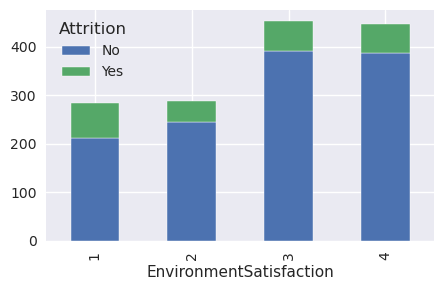

In [140]:
pivot_data.plot(kind='bar', stacked=True, figsize=(5, 3))

In [141]:
plt.figure(figsize=(5, 5))
px.box(x=df['Attrition'], y=df['EnvironmentSatisfaction'])

<Figure size 500x500 with 0 Axes>

In [142]:
import joypy
colors = sns.color_palette("mako")
fig, axes = joypy.joyplot(data=df, column=['Attrition', 'EnvironmentSatisfaction'], by='Attrition', overlap=2, figsize=(5, 4),color = colors)
plt.xlabel('Value')
plt.show()

ModuleNotFoundError: No module named 'joypy'

- **Joyplot Observation**: Environment satisfaction ranging starting from 1 have much higher density for attritions other than the ones that havee higher ratings

**Ans(10 & 16) : It is obvious and also makes sense that employees who rated their environment satisfaction with 1 have the highest attrition counts and also the most frequent attritions**

## 11.What factors are contributing more to employee attrition?

I have already measured correlation between attrition and all of the variables using pearson's correlation
*CHECK*
Let's try using 2 more correlation techniques

<Axes: >

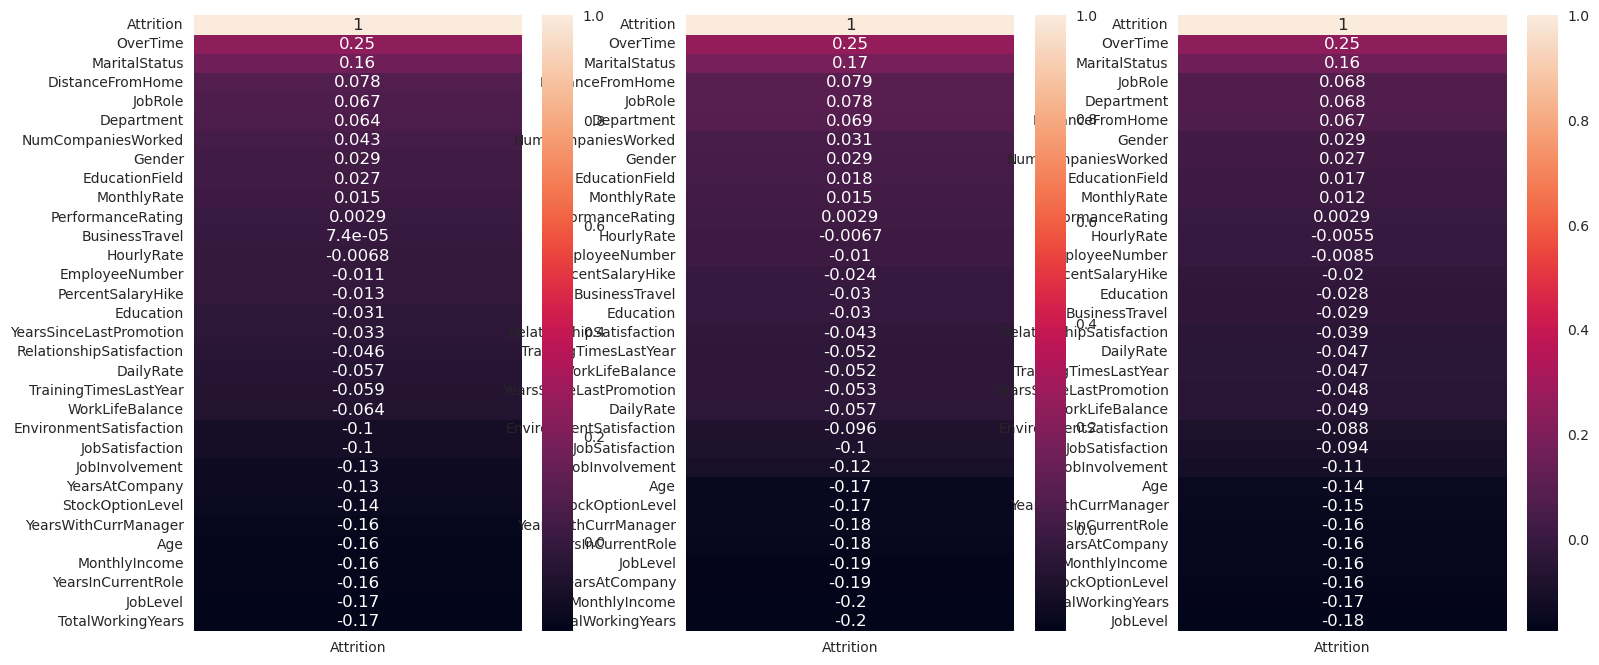

In [143]:
fig, ax = plt.subplots(1,3, figsize=(18, 8))

corr1 = df2.corr('pearson')[['Attrition']].sort_values(by='Attrition', ascending=False)
corr2 = df2.corr('spearman')[['Attrition']].sort_values(by='Attrition', ascending=False)
corr3 = df2.corr('kendall')[['Attrition']].sort_values(by='Attrition', ascending=False)


sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

In [144]:
from scipy.stats import linregress
pvalue={}
for feature in df2.columns:
    if feature != 'Attrition':
        print(feature)
        slope, intercept, r_value, p_value, std_err = linregress(df2[feature], df2['Attrition'])
        pvalue[feature]= p_value

Age
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [145]:
p_values_sorted= dict(sorted(pvalue.items(), key=lambda item: item[1], reverse=False))
p_values_sorted

{'OverTime': 1.0092540336567347e-21,
 'TotalWorkingYears': 4.0618781112671317e-11,
 'JobLevel': 6.795384780016687e-11,
 'MaritalStatus': 4.1060149408730804e-10,
 'YearsInCurrentRole': 6.003185843641528e-10,
 'MonthlyIncome': 7.147363985354435e-10,
 'Age': 8.356308021103709e-10,
 'YearsWithCurrManager': 1.7369867845242329e-09,
 'StockOptionLevel': 1.3010149660019424e-07,
 'YearsAtCompany': 2.3188716103864735e-07,
 'JobInvolvement': 5.677065356745603e-07,
 'JobSatisfaction': 7.043066741731461e-05,
 'EnvironmentSatisfaction': 7.172338549368747e-05,
 'DistanceFromHome': 0.002793060080213508,
 'JobRole': 0.010014034975793304,
 'Department': 0.014133018076805358,
 'WorkLifeBalance': 0.014211054989021941,
 'TrainingTimesLastYear': 0.022578499737202277,
 'DailyRate': 0.02985816066026536,
 'RelationshipSatisfaction': 0.07871363048466157,
 'NumCompaniesWorked': 0.09552526205651944,
 'YearsSinceLastPromotion': 0.2057899591624947,
 'Education': 0.22931520332230215,
 'Gender': 0.25909236414147996,


- Observation: P-values <0.05 shows that we reject the null hypothesis that the relationship between the applicants’ income and their work experience is not significant. In other words , we verified the correlated features using linear regression correlation test.

**Ans(11) : The three different correlation methods show the same variable as the top 5 most correlated variables with the target but with a slight difference in the value of correlation. The top 8 features contributing to Attrition are :**
- 1- overTime
- 2- TotalWorkingYears
- 3- JobLevel
- 4- YearsInCurrentRole
- 5- MonthlyIncome
- 6- Age
- 7- YearsAtCompany
- 8- YearsWithCurrManager

## 12. What type of measures should the company take in order to retain their employees?

- Based on the previous analysis the company should not let employees work overtime because this definetly stresses them out and make them more likely to leave . Also as employee shouldn't remain in the same job level or current role for too long, the company ought to promote more employees that show their dedication and also raise their salaries.

## 13.what is effect of age on attrition ?

In [146]:
import scipy.stats
point_biserial_corr = scipy.stats.pointbiserialr(df2['Age'], df2['Attrition'])

print("Point-Biserial Correlation Coefficient:", point_biserial_corr.correlation)
print("P-value:", point_biserial_corr.pvalue)

Point-Biserial Correlation Coefficient: -0.15920500686577957
P-value: 8.356308021103691e-10


In [147]:
plt.figure(figsize=(3, 5))

px.violin(df, x='Attrition', y='Age', box = True,color='Attrition', color_discrete_map= {'Yes': 'green', 'No': 'blue'})

<Figure size 300x500 with 0 Axes>

- **Violin plot observation**: Wider sections indicate higher density which means that age lying between 20 and 30 have higher attritions. Also the median of yes attritions are lower than that of No attritions

**Ans(13): The highest total number of attritions are from the younger employees especially the ones who are 29 to 31 years old. However, The highest percentage of attritions are from 19, 20, 18 years old employees. Hence, we can say that age and attrition are very weakly correlated based on the correlation values obtained from the above matrices and also from the point biserial correlation**

***Job satisfaction Impact on Attrition: Q17, 36***

## 17.How does self Job Satisfaction impact the Attrition?

In [148]:
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [151]:
Satisfaction_Attrition= df.groupby(['JobSatisfaction'])['Attrition'].value_counts().reset_index(name='count')
Satisfaction_Attrition

JobSatisfaction Attrition  count
0                1        No    223
1                1       Yes     66
2                2        No    234
3                2       Yes     46
4                3        No    369
5                3       Yes     73
6                4        No    407
7                4       Yes     52

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



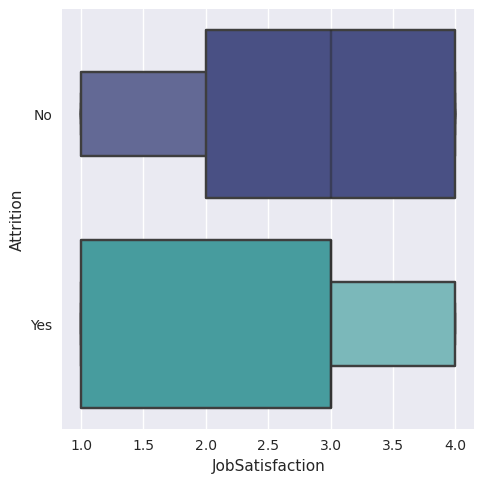

In [152]:
sns.catplot(
    data=df.sort_values("JobSatisfaction"),
    x="JobSatisfaction", y="Attrition", kind="boxen",palette='mako'
)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



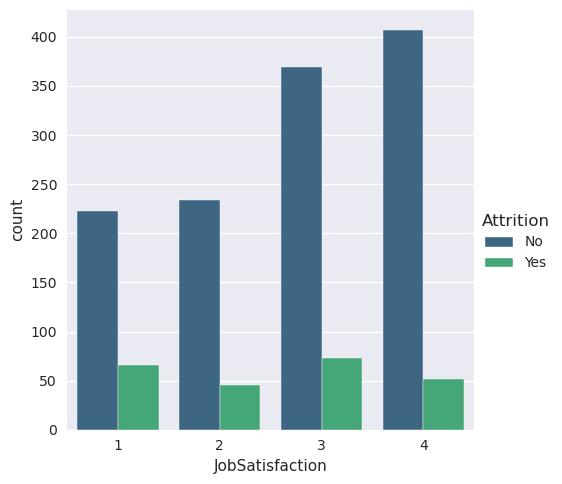

In [153]:
sns.catplot(Satisfaction_Attrition, x="JobSatisfaction", y="count", hue="Attrition", kind="bar", palette= 'viridis')

In [154]:
Satisfaction_Attrition[Satisfaction_Attrition['Attrition']=='Yes']

JobSatisfaction Attrition  count
1                1       Yes     66
3                2       Yes     46
5                3       Yes     73
7                4       Yes     52

**Ans(17): when Job satisfaction was 3 which is not bad the value of attritions was relatively the highest compared to the remaining ranks. Also, from the correlation matrices job satisfaction had no or very little correlation with attrition which means that the answer is NO Job Satisfaction doesn't impact attrition**

## 36. How does satisfaction and work-life balance relate to employee retention?

- relation to satisfaction and work life balance on their own are already mentioned in the correlation matrix in q35

In [157]:
WLBalance_Satisfaction = df.groupby(['JobSatisfaction','WorkLifeBalance'])['Attrition'].value_counts().reset_index(name='count')
WLBalance_Satisfaction= WLBalance_Satisfaction[WLBalance_Satisfaction['Attrition']=='No']
WLBalance_Satisfaction.sort_values('count',ascending=False)

JobSatisfaction  WorkLifeBalance Attrition  count
28                4                3        No    244
20                3                3        No    230
12                2                3        No    149
4                 1                3        No    143
26                4                2        No    105
18                3                2        No     83
10                2                2        No     50
2                 1                2        No     48
22                3                4        No     43
30                4                4        No     39
6                 1                4        No     23
14                2                4        No     21
24                4                1        No     19
8                 2                1        No     14
16                3                1        No     13
0                 1                1        No      9

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:1138: UserWarning:

cmap parameter ignored when using hue mapping.



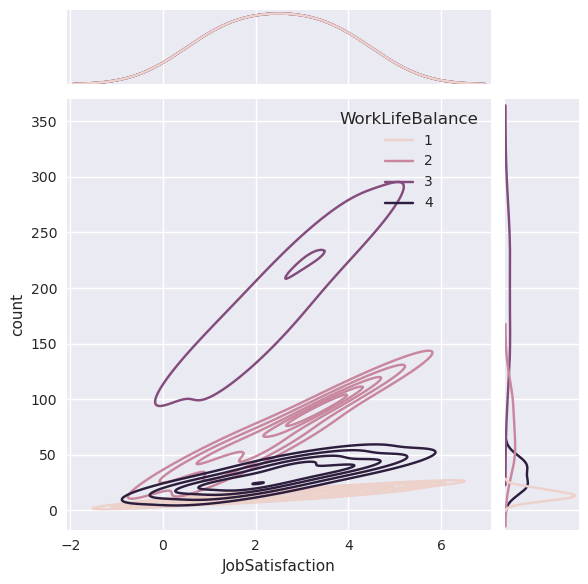

In [158]:
sns.jointplot(data=WLBalance_Satisfaction, x='JobSatisfaction', y='count', kind='kde',hue='WorkLifeBalance', cmap='mako')

Text(0.5, 0, 'JobSatisfaction')

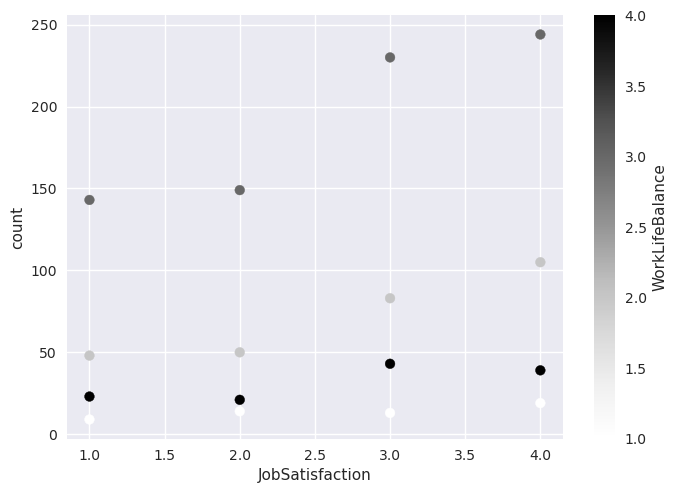

In [159]:
scatter=plt.scatter(WLBalance_Satisfaction['JobSatisfaction'],WLBalance_Satisfaction['count'],c=WLBalance_Satisfaction['WorkLifeBalance'] )
cbar = plt.colorbar(scatter)
cbar.set_label('WorkLifeBalance')
plt.ylabel('count')
plt.xlabel('JobSatisfaction')

**Ans(36): From the plots and numbers above, it is obvious that when job satisfaction increases and work life balance increases , employees retention increases.**

## 18.Does company stocks for employees impact attrition?

- Answered from the correlation matrix above

In [160]:
df['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [163]:
df.groupby(['StockOptionLevel'])['Attrition'].value_counts().reset_index(name='count')

StockOptionLevel Attrition  count
0                 0        No    477
1                 0       Yes    154
2                 1        No    540
3                 1       Yes     56
4                 2        No    146
5                 2       Yes     12
6                 3        No     70
7                 3       Yes     15

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



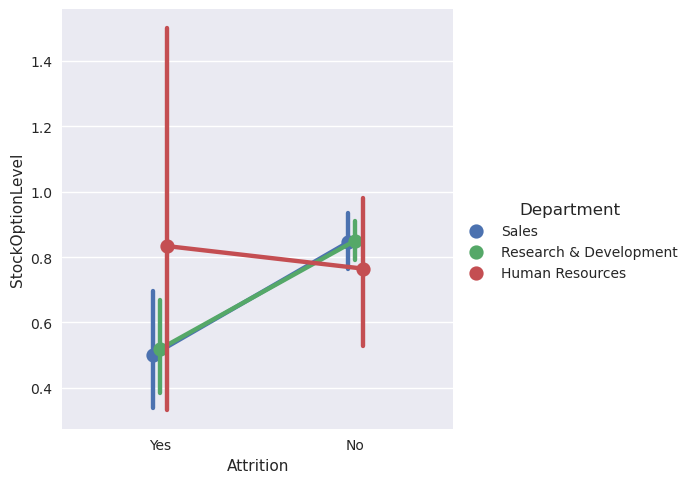

In [165]:
sns.catplot(data=df, x="Attrition", y="StockOptionLevel", hue="Department", kind="point",dodge=True)

- **Pointplots Observation**: The first point plot shows the change of attritions between different stock options on Departments showing HR with the highest confidence interval but little change between attritions however, the other departments show greater change between the two attritions. Also for HR more attritions occur for stock options higher than the other departments. 

**Ans(18): As stock option level decrease number of attritions increase.**

## 19. How does Work Life Balance impact the overall attrition rates?

In [166]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [169]:
WorkLife_Attrition = df.groupby(['WorkLifeBalance'])['Attrition'].value_counts().reset_index(name='count')
WorkLife_Attrition

WorkLifeBalance Attrition  count
0                1        No     55
1                1       Yes     25
2                2        No    286
3                2       Yes     58
4                3        No    766
5                3       Yes    127
6                4        No    126
7                4       Yes     27

In [170]:
pivot_workLife=WorkLife_Attrition.pivot(index='WorkLifeBalance', columns='Attrition', values='count')
pivot_workLife

Attrition         No  Yes
WorkLifeBalance          
1                 55   25
2                286   58
3                766  127
4                126   27

<Axes: xlabel='Attrition', ylabel='WorkLifeBalance'>

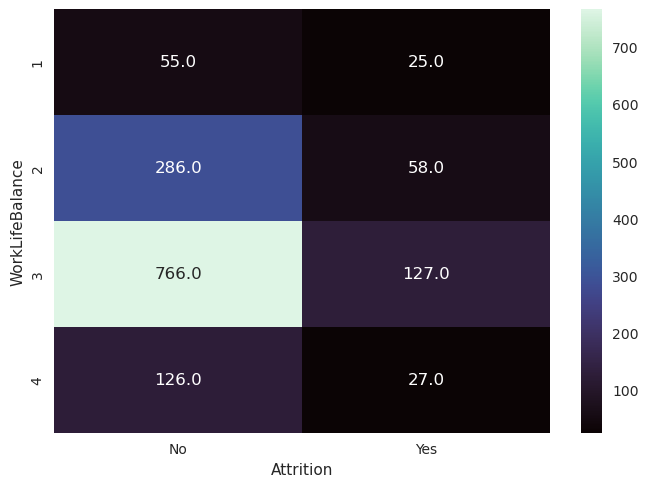

In [171]:
sns.heatmap(pivot_workLife, annot=True, cmap='mako', fmt='.1f')

<Axes: xlabel='Attrition', ylabel='WorkLifeBalance'>

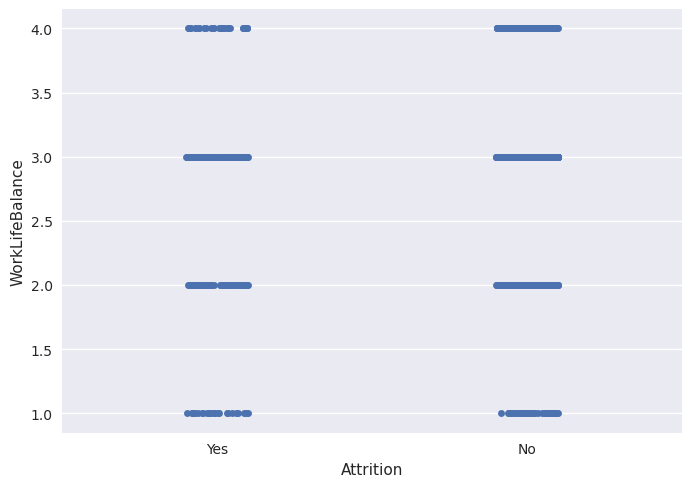

In [172]:
sns.stripplot(x="Attrition", y="WorkLifeBalance", data=df)

- **Heatmap observation**: There's no correlation between worklife balance and attrition because employees who rated worklife balance as 3 which is very good , have the highest number of attritions which doesn't make sense . Also, there's no trend between attrition and worklife balance

- **stripplot observation**: stripplot is used to show the difference in the number of counts in different worklife ranks. However, There's no large difference between both actually.

**Ans(19): There's no correlation between worklife balance and attrition . which means that there's no impact.**

## 20.How does work experience affect attrition?

In [173]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

- Assuming that YearsAtCompany and YearsInCurrentRole both represent experience

In [175]:
YearsAtCompany_Attrition=df.groupby(['YearsAtCompany'])['Attrition'].value_counts().reset_index(name='count')
YearsAtCompany_Attrition

YearsAtCompany Attrition  count
0                0        No     28
1                0       Yes     16
2                1        No    112
3                1       Yes     59
4                2        No    100
..             ...       ...    ...
59              33       Yes      1
60              34        No      1
61              36        No      2
62              37        No      1
63              40       Yes      1

[64 rows x 3 columns]

In [179]:
Experience_Attrition=df.groupby(['YearsInCurrentRole','YearsAtCompany'])['Attrition'].value_counts().reset_index(name='count')
Experience_Attrition= Experience_Attrition[Experience_Attrition['Attrition']=='Yes'].sort_values('count',ascending=False)
Experience_Attrition

YearsInCurrentRole  YearsAtCompany Attrition  count
3                     0               1       Yes     54
35                    2               2       Yes     25
37                    2               3       Yes     19
1                     0               0       Yes     16
39                    2               4       Yes      9
103                   7               7       Yes      8
69                    4               5       Yes      8
41                    2               5       Yes      8
55                    3               4       Yes      8
105                   7               8       Yes      7
107                   7               9       Yes      6
18                    1               1       Yes      5
71                    4               6       Yes      5
109                   7              10       Yes      5
57                    3               5       Yes      4
130                   8              10       Yes      3
144                   9              10       Yes      3
50                    2              10       Yes      3
59                    3               6       Yes      3
5                     0               2       Yes      2
76                    4              10       Yes      2
128                   8               9       Yes      2
47                    2               8       Yes      2
23                    1               4       Yes      2
187                  12              13       Yes      1
150                   9              15       Yes      1
126                   7              33       Yes      1
146                   9              11       Yes      1
209                  15              22       Yes      1
156                   9              21       Yes      1
171                  10              24       Yes      1
205                  14              32       Yes      1
136                   8              14       Yes      1
132                   8              11       Yes      1
196                  13              17       Yes      1
177                  10              40       Yes      1
87                    6               7       Yes      1
120                   7              19       Yes      1
118                   7              18       Yes      1
116                   7              16       Yes      1
113                   7              13       Yes      1
95                    6              20       Yes      1
84                    5              23       Yes      1
64                    3              10       Yes      1
45                    2               7       Yes      1
43                    2               6       Yes      1
32                    1              14       Yes      1
28                    1               7       Yes      1
25                    1               5       Yes      1
21                    1               3       Yes      1
14                    0              10       Yes      1
213                  15              31       Yes      1

In [180]:
correlation_company = df['YearsAtCompany'].corr(df2['Attrition'])
correlation_role = df['YearsInCurrentRole'].corr(df2['Attrition'])
correlation_company

-0.1343922139899768

In [181]:
correlation_role

-0.1605450042677009

In [182]:
df['YearsInCurrentRole'].corr(df['YearsAtCompany'])

0.7587537366134612

- **Correlation Observation** : Since both YearsInCurrentRole and YearsAtCompany are highly correlated , we can analyis the impact of only one of them on attrition

/tmp/ipykernel_32/4027878666.py:1: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

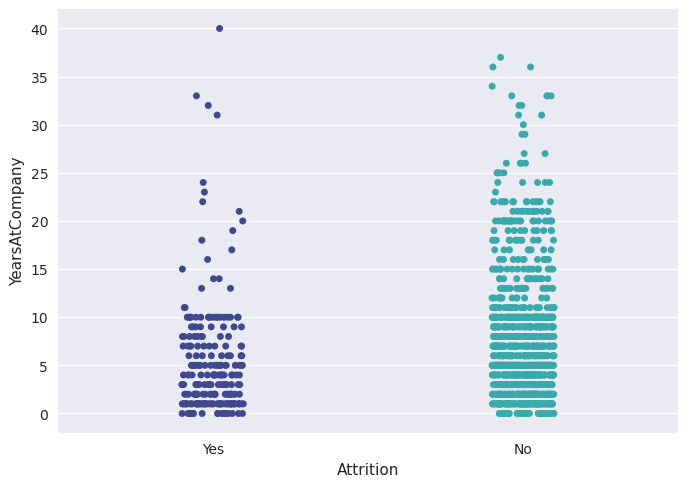

In [183]:
sns.stripplot(x="Attrition", y="YearsAtCompany", data=df,palette='mako')

- **Stripplot observation**: as years at company increase counts for yes attritions gradually decrease

/tmp/ipykernel_32/2433238627.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='YearsAtCompany', ylabel='Density'>

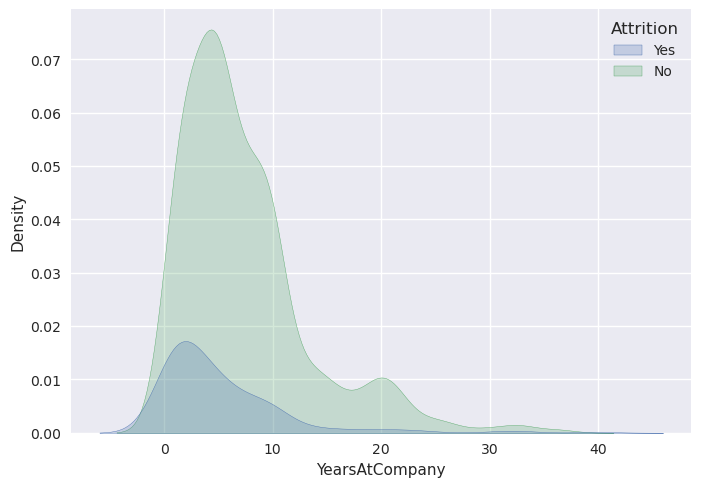

In [184]:
sns.kdeplot(data=df , x= 'YearsAtCompany', hue= 'Attrition', color='b', shade= True )

- **kde observation**: Attritions are most frequent when years at company lie between 0 to 5 years

**Ans(20): As Years in company and years in current role decrease , number of attritions increase. However both are not very strongly correlated with the target but they are very correlated with each other**

## 21. How does work duration in current role impact Attrition?

In [186]:
YearsInCurrentRole_Attrition=df.groupby(['YearsInCurrentRole'])['Attrition'].value_counts().reset_index(name='count')
YearsInCurrentRole_Attrition

YearsInCurrentRole Attrition  count
0                    0        No    171
1                    0       Yes     73
2                    1        No     46
3                    1       Yes     11
4                    2        No    304
5                    2       Yes     68
6                    3        No    119
7                    3       Yes     16
8                    4        No     89
9                    4       Yes     15
10                   5        No     35
11                   5       Yes      1
12                   6        No     35
13                   6       Yes      2
14                   7        No    191
15                   7       Yes     31
16                   8        No     82
17                   8       Yes      7
18                   9        No     61
19                   9       Yes      6
20                  10        No     27
21                  10       Yes      2
22                  11        No     22
23                  12        No      9
24                  12       Yes      1
25                  13        No     13
26                  13       Yes      1
27                  14        No     10
28                  14       Yes      1
29                  15        No      6
30                  15       Yes      2
31                  16        No      7
32                  17        No      4
33                  18        No      2

<Axes: xlabel='YearsInCurrentRole', ylabel='Yes'>

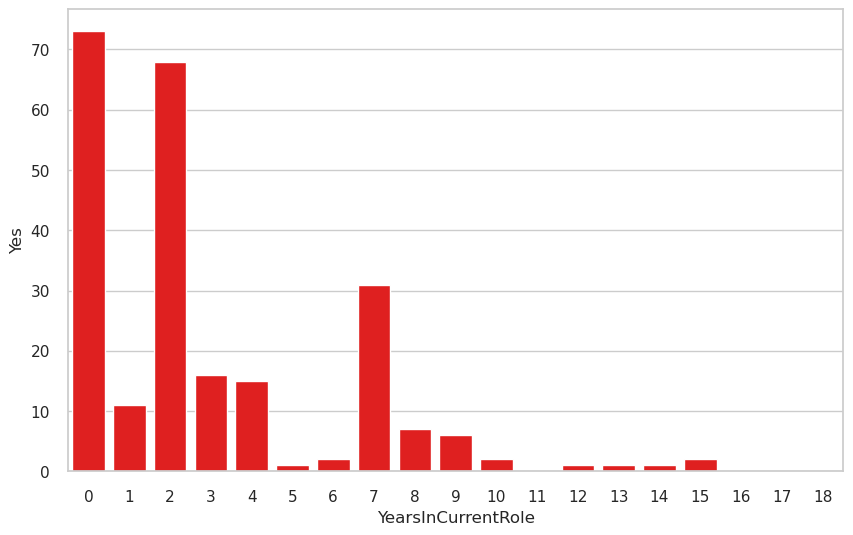

In [187]:
pivot_df = YearsInCurrentRole_Attrition.pivot(index='YearsInCurrentRole', columns='Attrition', values='count')

sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_df, x=pivot_df.index, y='Yes', color='red', label='Attrition: Yes')

**Ans(21): when years in current Role is zero  number of attritions is the highest, but after that there's no trend or gradual increase or decrease in attritions count because it is not highly correlated to attrition**

## 24. What business value does the model bring?

**Ans(24): the model can help identify employees who are at a higher risk of attrition. By proactively identifying potential attrition cases. Also, the model provides insights into attrition trends and patterns. By understanding which factors contribute to attrition, the business can better plan its workforce and allocate resources effectively. Moreover  reducing attrition contributes to the company's long-term growth and stability. Retaining experienced employees helps build institutional knowledge, maintain client relationships, and support the development of future leaders within the organization.**

## 25. Will the model save lots of money?

**Ans(25): Predicting whether an attrition model will save lots of money depends on the accuracy and effectiveness of the model, but assuming that the model is accurate:  by identifing employees who are at a higher risk of leaving the company well before they actually do. Moreover, with accurate predictions, the organization can implement personalized interventions for at-risk employees. These interventions can address specific concerns, offer incentives, or provide growth opportunities that resonate with each employee's situation. Also, High employee turnover can negatively impact team morale and productivity. When employees see their colleagues leaving, it can create uncertainty and stress. By preventing attrition, the organization maintains a stable and motivated workforce.**

## 31.Does the source of the employee matter? Which website produces the best employees?

Yes, the source of an employee matters for several reasons:

- Quality of Candidates: Different recruitment sources attract different types of candidates. Some sources might yield a higher quality of candidates with the skills and experience you're seeking, while others might result in a larger pool of less qualified candidates.

- Relevance to Industry and Role: Industry-specific job boards or platforms can attract candidates who are already familiar with the industry's demands and requirements. This can lead to faster onboarding and a smoother integration into the company.

- Employee Referrals: Candidates referred by current employees often have a higher likelihood of fitting into the company culture and being successful in the role.

- Specialized Skills: If you're looking for candidates with specialized skills, you might need to use sources that cater to those specific skills or industries.

websites that are commonly used for recruiting employees:
- LinkedIn: LinkedIn is a professional networking platform that is widely used for recruiting. It allows you to target candidates based on their skills, experience, and industry.

- Indeed: Indeed is a job search engine that aggregates job listings from various sources. It's popular among job seekers and offers a wide range of job listings.

- Glassdoor: Glassdoor provides job listings as well as company reviews and ratings from employees. It's a platform that allows job seekers to gain insights into a company's culture.

- Monster: Monster is an established job board that offers job listings in various industries and locations.

- CareerBuilder: CareerBuilder is another job board that offers a wide range of job listings and resources for both employers and job seekers.

- Dice: Dice is focused on tech and IT jobs, making it a good choice for companies in the technology industry.

## 32. Is JobLevel equivalent to performance? Can we create a feature to measure this?

In [188]:
sorted_df= df[['JobLevel','PerformanceRating']].sort_values('JobLevel')
sorted_df

JobLevel  PerformanceRating
734          1                  3
487          1                  3
1064         1                  4
490          1                  3
1061         1                  3
...        ...                ...
190          5                  3
392          5                  3
936          5                  4
411          5                  3
165          5                  3

[1470 rows x 2 columns]

In [189]:
sorted_df['JobLevel'].corr(sorted_df['PerformanceRating'])

-0.021222082108857416

We can measure their equivalence by: 
- calculating the attrition counts for both and deciding if they are equivalent or not based on a threshold

In [192]:
grouped_JobLevel_Perf=df.groupby(['JobLevel','PerformanceRating'])['Attrition'].value_counts().reset_index(name='count')
grouped_JobLevel_Perf[grouped_JobLevel_Perf['Attrition']=='Yes']

JobLevel  PerformanceRating Attrition  count
1          1                  3       Yes    116
3          1                  4       Yes     27
5          2                  3       Yes     46
7          2                  4       Yes      6
9          3                  3       Yes     28
11         3                  4       Yes      4
13         4                  3       Yes      5
16         5                  3       Yes      5

In [195]:
grouped_JobLevel=df.groupby(['JobLevel'])['Attrition'].value_counts().reset_index(name='count')
grouped_JobLevel=grouped_JobLevel[grouped_JobLevel['Attrition']=='Yes']
grouped_JobLevel

JobLevel Attrition  count
1         1       Yes    143
3         2       Yes     52
5         3       Yes     32
7         4       Yes      5
9         5       Yes      5

In [196]:
grouped_Perf=df.groupby(['PerformanceRating'])['Attrition'].value_counts().reset_index(name='count')
grouped_Perf=grouped_Perf[grouped_Perf['Attrition']=='Yes']
grouped_Perf

PerformanceRating Attrition  count
1                  3       Yes    200
3                  4       Yes     37

In [197]:
df['IsEquivalent'] = df.apply(lambda row: abs(grouped_JobLevel[grouped_JobLevel['JobLevel']==row['JobLevel']]['count'].values[0] - grouped_Perf[grouped_Perf['PerformanceRating']==row['PerformanceRating']]['count'].values[0]) < 50, axis=1)

In [198]:
df['IsEquivalent'].value_counts()

False    1332
True      138
Name: IsEquivalent, dtype: int64

In [199]:
138/(1332+138)*100

9.387755102040817

- **Ans(32): The ratio of True to False (9% True) Implies that they are not equivalent which makes sense because both features represents different meanings**

## 34. What sources are best for high performing employees?

- Networking Events and Conferences: Attend industry conferences, seminars, and networking events. High-performing individuals often participate in these events to stay updated on industry trends and connect with peers.

- Employee Referrals: Your current high-performing employees likely have connections to other talented professionals. Implementing a robust employee referral program can help you tap into this network.

- Recruitment Agencies: Specialized recruitment agencies can help you find top-tier candidates with specific skill sets or experience. They often have access to passive candidates who may not be actively looking for new opportunities.

- Executive Search Firms: For senior and executive-level positions, consider working with executive search firms that specialize in identifying and recruiting top-tier talent.

- Online Professional Communities: Participate in online forums, discussion groups, and platforms related to your industry. Engaging in conversations and building a reputation can attract high-performing candidates.

- Internship Programs: Develop internship programs to identify and nurture promising young talent. High-performing interns can eventually transition into full-time roles.

- Portfolio Websites: Depending on the role, individuals in creative or technical fields often showcase their work on portfolio websites like Behance, GitHub, or Dribbble.

- Direct Outreach and Headhunting: Identify individuals with strong profiles in your industry and reach out to them directly. Expressing interest in their skills and accomplishments can pique their interest.

- Professional Associations: Many industries have professional associations that host events and maintain job boards. Engaging with these associations can help you connect with high-performing professionals.

- Competitions and Hackathons: Consider sponsoring or participating in competitions and hackathons relevant to your industry. This can be an excellent way to identify top talent.

## 35.What factors contribute to retaining high performing employees?

In [200]:
newdf=df[(df['Attrition']=='No')& (df['PerformanceRating']==4)]
newdf

Age Attrition     BusinessTravel  DailyRate              Department  \
1      49        No  Travel_Frequently        279  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
44     30        No  Travel_Frequently        721  Research & Development   
...   ...       ...                ...        ...                     ...   
1441   56        No         Non-Travel        667  Research & Development   
1445   41        No      Travel_Rarely        582  Research & Development   
1446   34        No      Travel_Rarely        704                   Sales   
1447   36        No         Non-Travel        301                   Sales   
1467   27        No      Travel_Rarely        155  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeNumber  \
1                    8          1  Life Sciences               2   
6                    3          3        Medical              10   
7                   24          1  Life Sciences              11   
8                   23          3  Life Sciences              12   
44                   1          2        Medical              57   
...                ...        ...            ...             ...   
1441                 1          4  Life Sciences            2026   
1445                28          4  Life Sciences            2034   
1446                28          3      Marketing            2035   
1447                15          4      Marketing            2036   
1467                 4          3  Life Sciences            2064   

      EnvironmentSatisfaction  ... RelationshipSatisfaction  StockOptionLevel  \
1                           3  ...                        4                 1   
6                           3  ...                        1                 3   
7                           4  ...                        2                 1   
8                           4  ...                        2                 0   
44                          3  ...                        4                 0   
...                       ...  ...                      ...               ...   
1441                        3  ...                        1                 1   
1445                        1  ...                        3                 1   
1446                        4  ...                        4                 2   
1447                        4  ...                        1                 1   
1467                        2  ...                        2                 1   

      TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
1                    10                      3               3   
6                    12                      3               2   
7                     1                      2               3   
8                    10                      2               3   
44                   12                      2               3   
...                 ...                    ...             ...   
1441                 13                      2               2   
1445                 21                      3               3   
1446                  8                      2               3   
1447                 15                      4               2   
1467                  6                      0               3   

      YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
1                 10                  7                        1   
6                  1                  0                        0   
7                  1                  0                        0   
8                  9                  7                        1   
44                12                  8                        3   
...              ...                ...                      ...   
1441              13  

In [201]:
newdf= newdf.select_dtypes(include='int64')
correlation=newdf.corr()
correlation

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000  -0.036568         -0.103871   0.263227   
DailyRate                -0.036568   1.000000         -0.016009  -0.099335   
DistanceFromHome         -0.103871  -0.016009          1.000000   0.000248   
Education                 0.263227  -0.099335          0.000248   1.000000   
EmployeeNumber            0.068652  -0.083350          0.005790   0.062331   
EnvironmentSatisfaction  -0.090282  -0.141046         -0.028159  -0.059527   
HourlyRate                0.124198   0.112568          0.136397   0.108976   
JobInvolvement           -0.057758   0.084711          0.006635  -0.040552   
JobLevel                  0.456516  -0.039956          0.031765   0.109081   
JobSatisfaction          -0.092169   0.052019          0.091927  -0.003122   
MonthlyIncome             0.445668  -0.005190          0.027974   0.111635   
MonthlyRate               0.099519   0.007124         -0.022105   0.064795   
NumCompaniesWorked        0.327030   0.031734         -0.115334   0.115904   
PercentSalaryHike        -0.004887   0.010822          0.087510  -0.058526   
PerformanceRating              NaN        NaN               NaN        NaN   
RelationshipSatisfaction  0.028508  -0.008924          0.066399  -0.076281   
StockOptionLevel          0.100478   0.046209          0.057728  -0.060465   
TotalWorkingYears         0.656455   0.004631         -0.032274   0.278249   
TrainingTimesLastYear    -0.131527   0.144585          0.110681  -0.007943   
WorkLifeBalance           0.019516  -0.196794         -0.067451   0.049888   
YearsAtCompany            0.238510  -0.036919          0.059000   0.057414   
YearsInCurrentRole        0.165500   0.019023          0.040843   0.023605   
YearsSinceLastPromotion   0.185817  -0.007806         -0.055435  -0.011029   
YearsWithCurrManager      0.125241  -0.059758          0.096483   0.109542   

                          EmployeeNumber  EnvironmentSatisfaction  HourlyRate  \
Age                             0.068652                -0.090282    0.124198   
DailyRate                      -0.083350                -0.141046    0.112568   
DistanceFromHome                0.005790                -0.028159    0.136397   
Education                       0.062331                -0.059527    0.108976   
EmployeeNumber                  1.000000                 0.063189    0.052499   
EnvironmentSatisfaction         0.063189                 1.000000   -0.148187   
HourlyRate                      0.052499                -0.148187    1.000000   
JobInvolvement                 -0.045706                -0.117331    0.048720   
JobLevel                        0.117156                -0.009366   -0.094026   
JobSatisfaction                -0.019417                -0.011430   -0.072488   
MonthlyIncome                   0.138153                -0.015176   -0.058358   
MonthlyRate                     0.051011                 0.052592    0.034131   
NumCompaniesWorked             -0.040216                 0.106375    0.032115   
PercentSalaryHike              -0.006472                -0.032749   -0.027542   
PerformanceRating                    NaN                      NaN         NaN   
RelationshipSatisfaction       -0.169194                 0.007767    0.025748   
StockOptionLevel                0.065638                -0.079627    0.140882   
TotalWorkingYears               0.107060                -0.036269    0.032365   
TrainingTimesLastYear           0.093729                -0.041532    0.020236   
WorkLifeBalance                 0.142201                 0.050022    0.050113   
YearsAtCompany                  0.087927                 0.015387   -0.026237   
YearsInCurrentRole              0.076258                 0.039122   -0.069769   
YearsSinceLastPromotion         0.043095                -0.064294   -0.050802   
YearsWithCurrManager            0.064240                 0.028514   -0.023051   

                          JobInvolvement  JobLevel  Jo

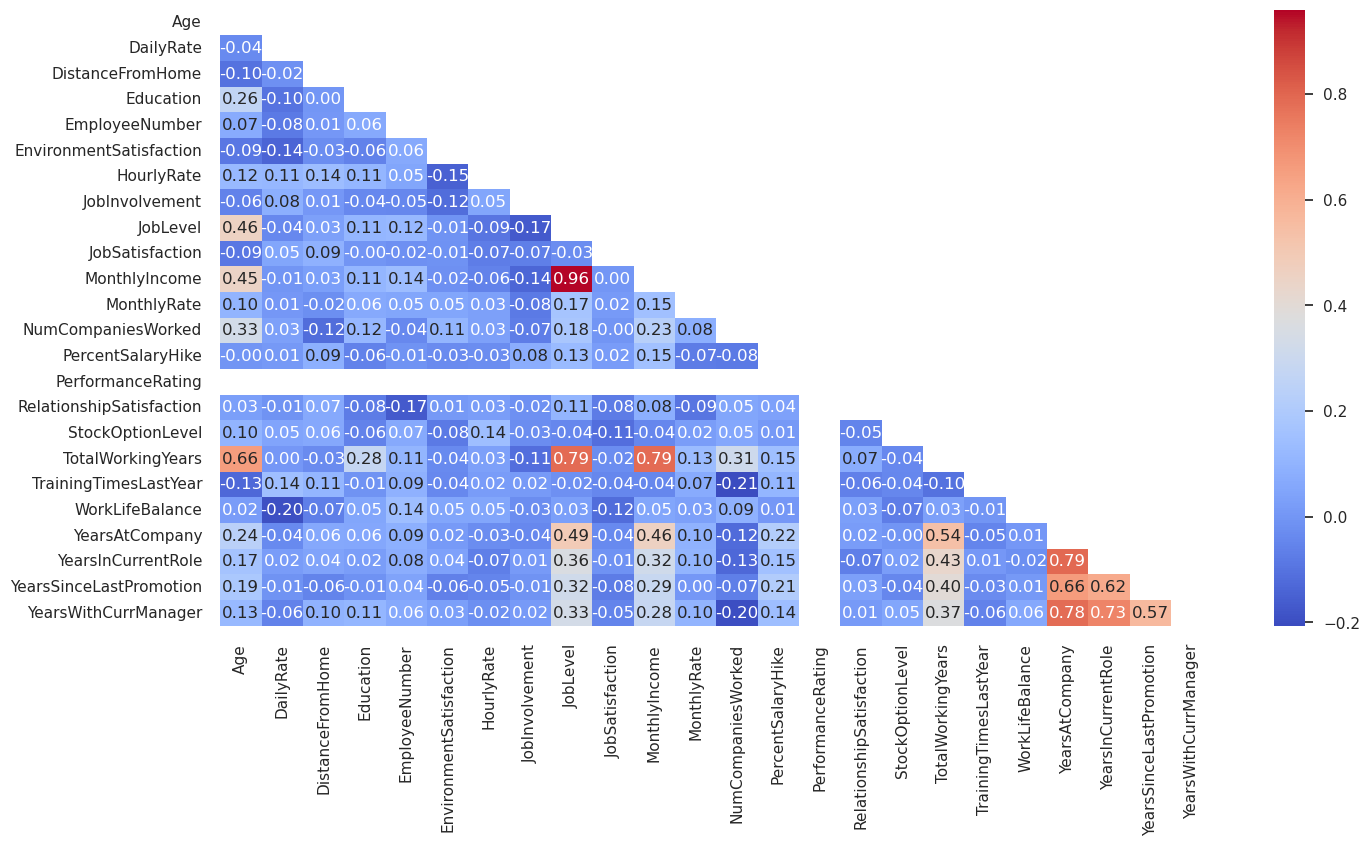

In [202]:
plt.figure(figsize=(16, 8))
sns.set(style="white") 

mask = np.triu(correlation) 
sns.heatmap(data=correlation, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)

plt.show()

- **Heatmap Observation**: We can Identify clearly which features have high correlation with other features when attrition = NO

In [204]:
attrition_grouped_no = {}
for column in df_numerical.columns:
    if column != 'Attrition':  
        correlation_df = df_numerical.groupby([column])['Attrition'].value_counts().reset_index(name='count').sort_values('count',ascending=False)
        attrition_counts = correlation_df[correlation_df['Attrition'] == 'No']
        attrition_grouped_no[column] = attrition_counts

In [205]:
attrition_correlations_no={}
for key,value in attrition_grouped_no.items():
    attrition_correlations_no[key]=attrition_grouped_no[key][key].corr(attrition_grouped_no[key]['count'])
attrition_correlations_no

{'Age': -0.1780243437942997,
 'DailyRate': 0.026148150703064525,
 'DistanceFromHome': -0.7098068238322821,
 'Education': -0.08463297828252739,
 'EmployeeNumber': nan,
 'EnvironmentSatisfaction': 0.9226971827324288,
 'HourlyRate': 0.19492250856227777,
 'JobInvolvement': 0.2795822543330141,
 'JobLevel': -0.8991163589591479,
 'JobSatisfaction': 0.9486425970712077,
 'MonthlyIncome': -0.12658496964495086,
 'MonthlyRate': -0.026777007039595277,
 'NumCompaniesWorked': -0.722995205610142,
 'PercentSalaryHike': -0.9184340216176631,
 'PerformanceRating': -1.0,
 'RelationshipSatisfaction': 0.9028694766533188,
 'StockOptionLevel': -0.8882943547548726,
 'TotalWorkingYears': -0.5871782304098129,
 'TrainingTimesLastYear': -0.08889668721317898,
 'WorkLifeBalance': 0.2794987718049154,
 'YearsAtCompany': -0.7656702053488762,
 'YearsInCurrentRole': -0.6821574980055574,
 'YearsSinceLastPromotion': -0.7020362369714721,
 'YearsWithCurrManager': -0.6962157540705294}

Text(0, 0.5, 'Feature')

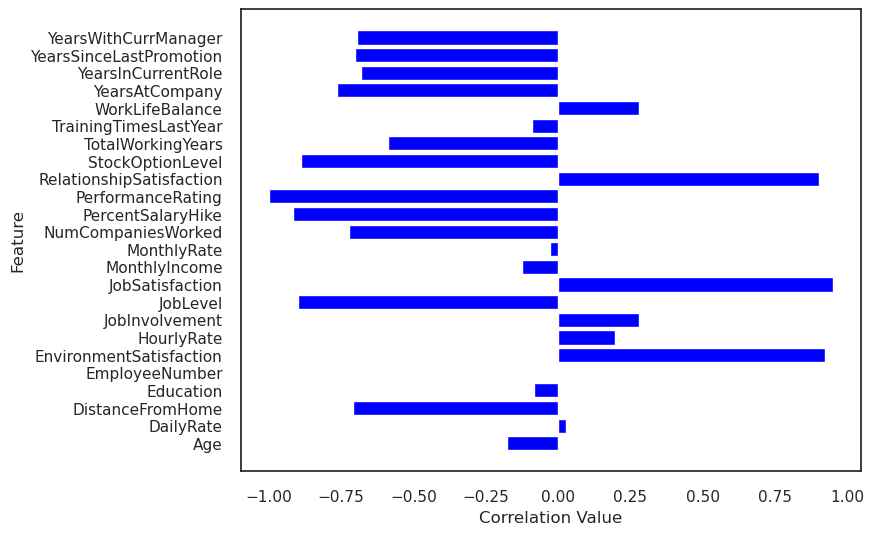

In [206]:
variables = list(attrition_correlations_no.keys())
correlation_values = list(attrition_correlations_no.values())

plt.figure(figsize=(8, 6))
plt.barh(variables, correlation_values, color='blue')
plt.xlabel('Correlation Value')
plt.ylabel('Feature')

**Ans(35): The highly correlated attributes or The most contributing factors to retaining High performance employees are :**
- YearsAtCompany
- Environment Satisfaction
- Job Satisfaction
- Job level
- Percent Salary Hike
- Stock Option level
- Relationship Satisfaction

## 37.How many new hires leave in less than a year and why?

In [207]:
years_attrition_yes = df.groupby(['YearsAtCompany'])['Attrition'].value_counts().reset_index(name='count')
years_attrition_yes= years_attrition_yes[years_attrition_yes['Attrition']=='Yes']
years_attrition_yes.sort_values('count',ascending=False)

YearsAtCompany Attrition  count
3                1       Yes     59
5                2       Yes     27
11               5       Yes     21
7                3       Yes     20
9                4       Yes     19
21              10       Yes     18
1                0       Yes     16
15               7       Yes     11
17               8       Yes      9
13               6       Yes      9
19               9       Yes      8
23              11       Yes      2
26              13       Yes      2
28              14       Yes      2
44              22       Yes      1
59              33       Yes      1
57              32       Yes      1
55              31       Yes      1
48              24       Yes      1
46              23       Yes      1
30              15       Yes      1
42              21       Yes      1
40              20       Yes      1
38              19       Yes      1
36              18       Yes      1
34              17       Yes      1
32              16       Yes      1
63              40       Yes      1

In [208]:
years_attrition_yes[years_attrition_yes['YearsAtCompany']==0]

YearsAtCompany Attrition  count
1               0       Yes     16

In [209]:
df[df['YearsAtCompany']==0]['YearsAtCompany'].count()

44

In [210]:
16/44 *100

36.36363636363637

**Ans(37): only 16 leave after less than a year , which is a 36% (relatively a small percentage) , and I believe this is because employees who spend less than a year at the company are less stable in their jobs as well as with their manager. Moreover, they receive less income compared to employees who spend more years in the company**

## 38.What is the rate of resignations each year versus the rate of new appointments?

*Assumptions*: 

- Assuming, new appointments(newly hired employees) have their total working years = 0

Let's get the ratio of resignations to the ratio of employee retentions.

In [211]:
df['Attrition'].value_counts()/df.shape[0]*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

([<matplotlib.patches.Wedge at 0x78222fc0d4b0>,
 [Text(0.39383875959979536, -1.027078882772348, 'No'),
  Text(-0.42964212584366557, 1.1204497506361166, 'Yes')],
 [Text(0.21482114159988838, -0.5602248451485534, '83.9%'),
  Text(-0.2506245734088049, 0.653595687871068, '16.1%')])

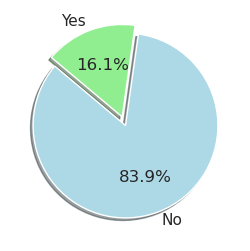

In [212]:
labels = ['No', 'Yes']
sizes = [83.877551, 16.122449]
colors = ['lightblue', 'lightgreen']
explode = (0, 0.1)  

plt.figure(figsize=(3, 3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)


In [213]:
#Employees who were newly hired and didn't leave the company
data1=df[(df['YearsAtCompany']==0) & (df['Attrition']=='No')& (df['TotalWorkingYears']==0) ].count()
data1= data1[0]
data1

6

In [214]:
#Employees who are not newly hired and left the company
data2=df[(df['YearsAtCompany']!=0) & (df['Attrition']=='Yes')& (df['TotalWorkingYears']!=0) ].count()
data2=data2[0]
data2

221

In [215]:
data2/df.shape[0]*100

15.034013605442176

In [216]:
data1/df.shape[0]*100

0.40816326530612246

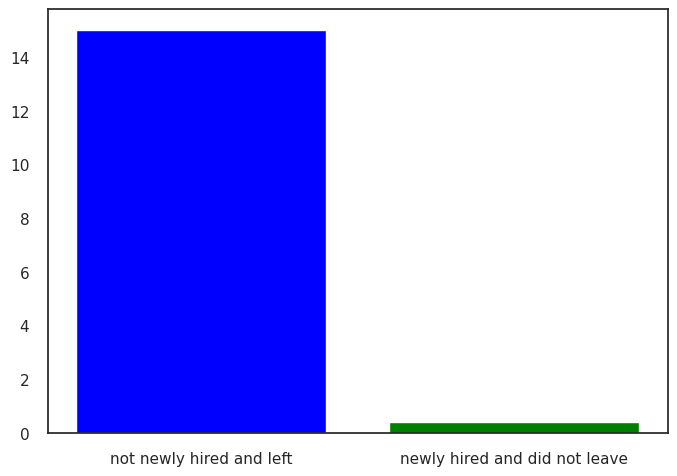

In [217]:
labels = ['not newly hired and left', 'newly hired and did not leave']
percentages = [15.034013605442176, 0.40816326530612246]
colors = ['blue', 'green']

fig, ax = plt.subplots()
bars = ax.bar(labels, percentages, color=colors)

**Ans(38): Percentage of employees who are not newly hired and left the company is higher than percentage of who were newly hired and didn't leave the company.**